In [1]:
import optuna
import plotly
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime

# from optuna.visualization import plot_contour
# from optuna.visualization import plot_edf
# from optuna.visualization import plot_intermediate_values
# from optuna.visualization import plot_optimization_history
# from optuna.visualization import plot_parallel_coordinate
# from optuna.visualization import plot_param_importances
# from optuna.visualization import plot_slice
print(plotly.__version__)  

5.18.0


In [2]:
import glob
import os

directory_path = 'database'
CB_pattern = f"{directory_path}/2211_CodeBERT_*_evals9_samples*.db"
GCB_pattern = f"{directory_path}/2211_GraphCodeBERT_*_evals9_samples*.db"

study_names = [os.path.basename(x)[:-3] for x in glob.glob(CB_pattern) if "loss_loss" not in x and "f1_f1" not in x]
CB_study_names = sorted(study_names)
print(CB_study_names)
# for filepath in glob.glob(pattern):
#     filename = os.path.basename(filepath)
#     print(filename)
    
study_names = [os.path.basename(x)[:-3] for x in glob.glob(GCB_pattern) if "loss_loss" not in x and "f1_f1" not in x]
GCB_study_names = sorted(study_names)
print(GCB_study_names)

['2211_CodeBERT_balanced_accuracy_default_max_evals9_samples40960', '2211_CodeBERT_balanced_accuracy_descendants_max_evals9_samples40960', '2211_CodeBERT_balanced_accuracy_equalize_max_evals9_samples40960', '2211_CodeBERT_balanced_accuracy_reachable_leaf_nodes_max_evals9_samples40960', '2211_CodeBERT_f1_CE_max_evals9_samples40960', '2211_CodeBERT_f1_FL_max_evals9_samples40960', '2211_CodeBERT_f1_default_max_evals9_samples40960', '2211_CodeBERT_f1_descendants_max_evals9_samples40960', '2211_CodeBERT_f1_equalize_max_evals9_samples40960', '2211_CodeBERT_f1_reachable_leaf_nodes_max_evals9_samples40960']
['2211_GraphCodeBERT_balanced_accuracy_default_max_evals9_samples40960', '2211_GraphCodeBERT_balanced_accuracy_descendants_max_evals9_samples40960', '2211_GraphCodeBERT_balanced_accuracy_equalize_max_evals9_samples40960', '2211_GraphCodeBERT_balanced_accuracy_reachable_leaf_nodes_max_evals9_samples40960', '2211_GraphCodeBERT_f1_CE_max_evals9_samples40960', '2211_GraphCodeBERT_f1_FL_max_eval

In [3]:
def get_studies(study_names):
    studies = []
    for study_name in study_names:
        db_url = f"sqlite:///database/{study_name}.db"
        study = optuna.load_study(study_name=study_name, storage=db_url)
        studies.append(study)
    return studies

CB_studies = get_studies(CB_study_names)
GCB_studies = get_studies(GCB_study_names)

In [4]:
def plot_optimization_history(study_names, studies):
    for i, study in enumerate(studies):
        optuna.visualization.matplotlib.plot_optimization_history(study)
        plt.tight_layout()
        plt.title(f"{study_names[i]} Optimization History")
        plt.show()

        # Slice Plot
def plot_slice(study_names, studies):
    for i, study in enumerate(studies):
        optuna.visualization.matplotlib.plot_slice(study)
        plt.tight_layout()
        plt.title(f"{study_names[i]} Slice Plot")
        plt.show()

    # optuna.visualization.matplotlib.plot_slice(study)
    # plt.show()
        
def plot_param_importances(study_names, studies):
    for i, study in enumerate(studies):
        optuna.visualization.matplotlib.plot_param_importances(study)
        plt.tight_layout()
        plt.title(f"{study_names[i]} Param Importance")
        plt.show()

        # optuna.visualization.matplotlib.plot_param_importances(study)
        # plt.show()

        # sns.set_theme()
        # sns.set_style("whitegrid")
        # x = optuna.visualization.matplotlib.plot_param_importances(study_eqaulize)

        # plt.tight_layout()
        # plt.savefig('hpo_importance.png')
        # plt.show()

def plot_optimization_histories(study_names, studies):
    plt.figure(figsize=(10, 6))

    for study, name in zip(studies, study_names):
        trials = study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
        best_values = [float('inf')] * len(trials)
        for i, trial in enumerate(sorted(trials, key=lambda x: x.number)):
            if i > 0:
                best_values[i] = min(best_values[i - 1], trial.value)
            else:
                best_values[i] = trial.value
        
        plt.plot(best_values, label=name)

    plt.title("Optimization Histories Comparison")
    plt.xlabel("Number of Trials")
    plt.ylabel("Best Objective Value")
    plt.legend()
    plt.grid()
    plt.show()


def plot_values_over_time(study_names, studies):
    plt.figure(figsize=(12, 6))
    
    for study, name in zip(studies, study_names):
        trial_timestamps = [datetime.fromtimestamp(trial.datetime_start.timestamp()) for trial in study.trials]
        trial_values = [trial.value for trial in study.trials]

        plt.plot(trial_timestamps, trial_values, marker='o', label=name)

    # Formatting the plot
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gcf().autofmt_xdate()  # Rotation

    plt.title("Objective Values Over Time Across Studies")
    plt.xlabel("Time")
    plt.ylabel("Objective Value")
    plt.legend()
    plt.grid()
    plt.show()


## CodeBERT HPO Visualization

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


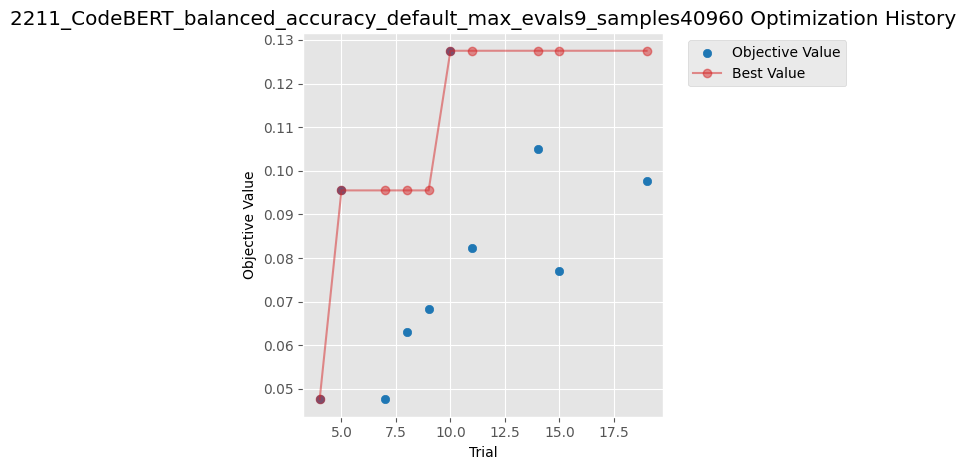

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


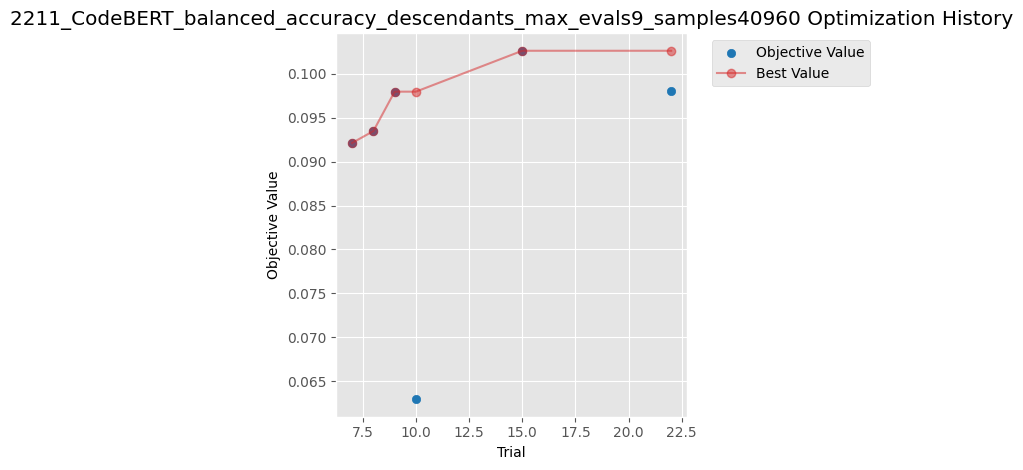

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


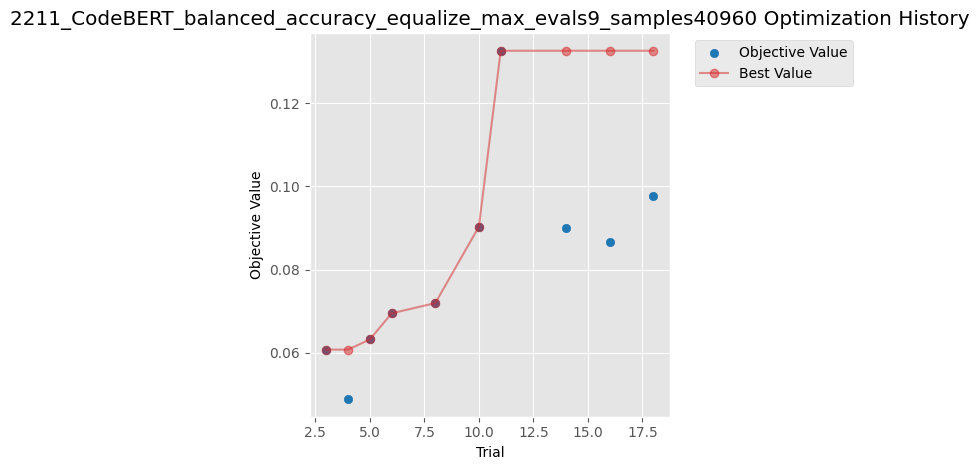

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


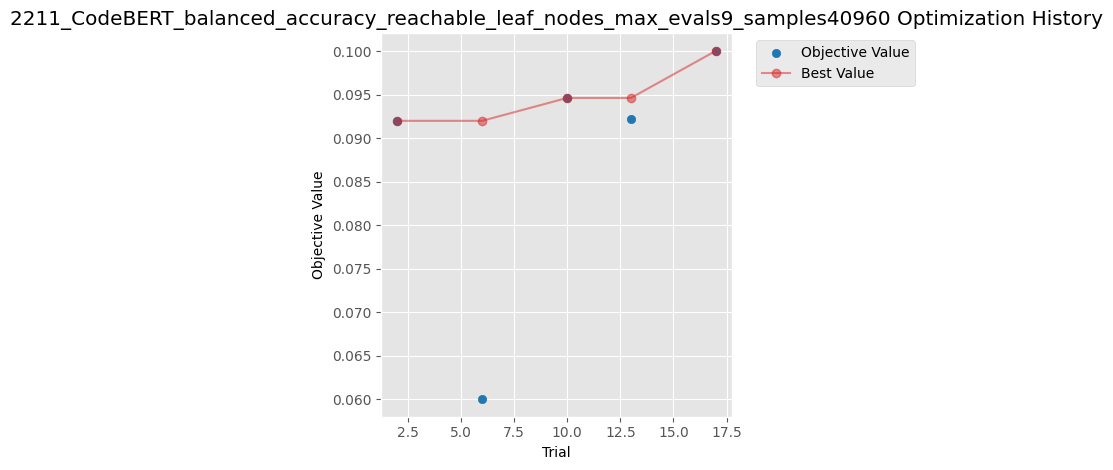

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


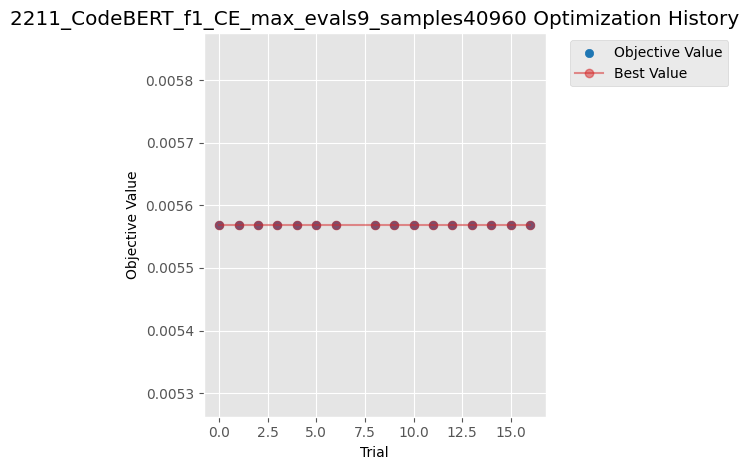

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


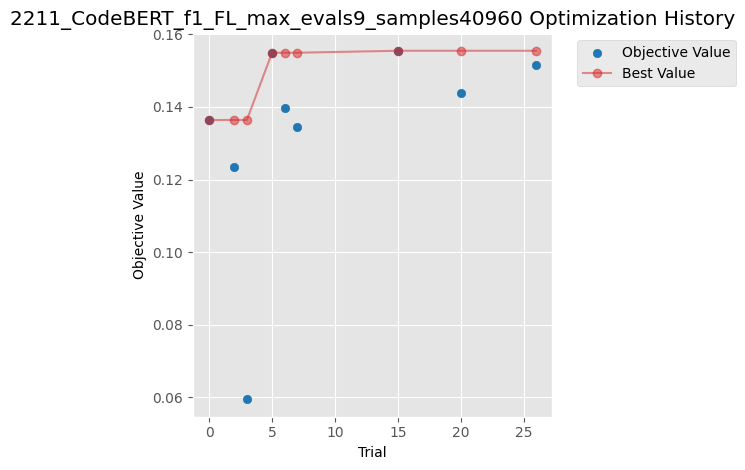

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


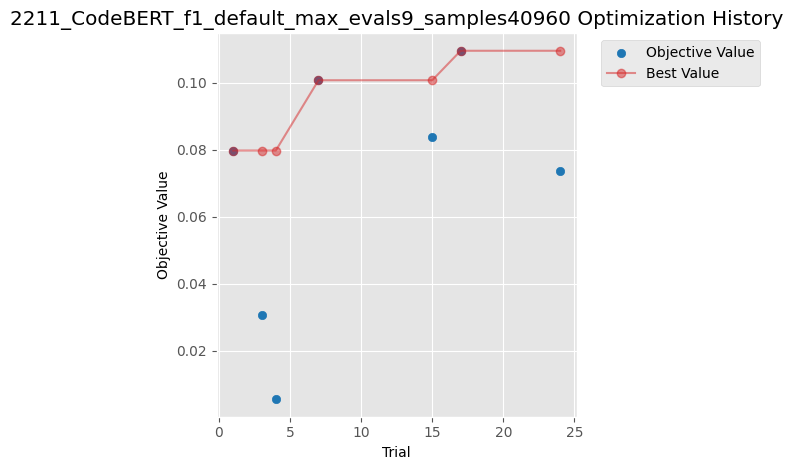

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


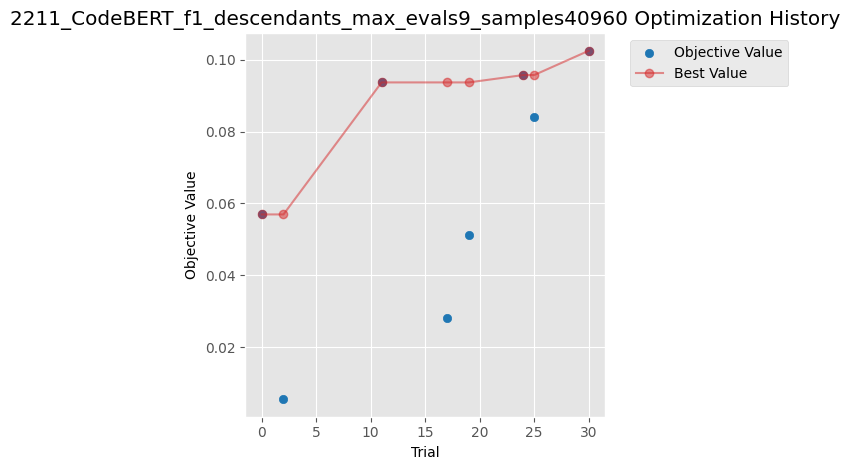

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


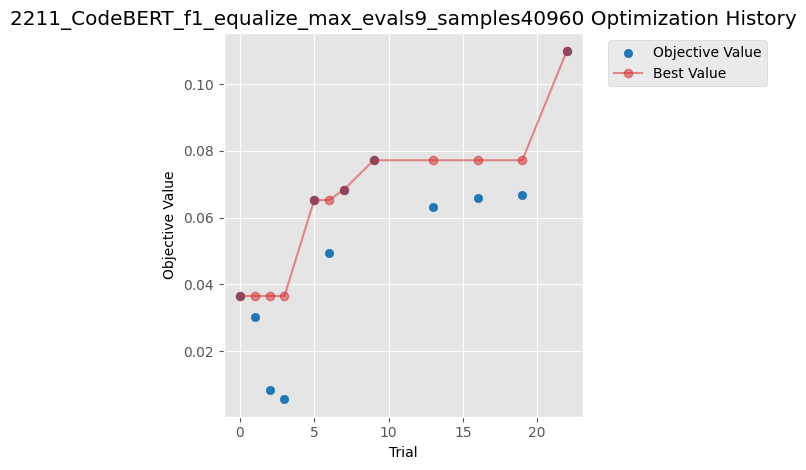

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


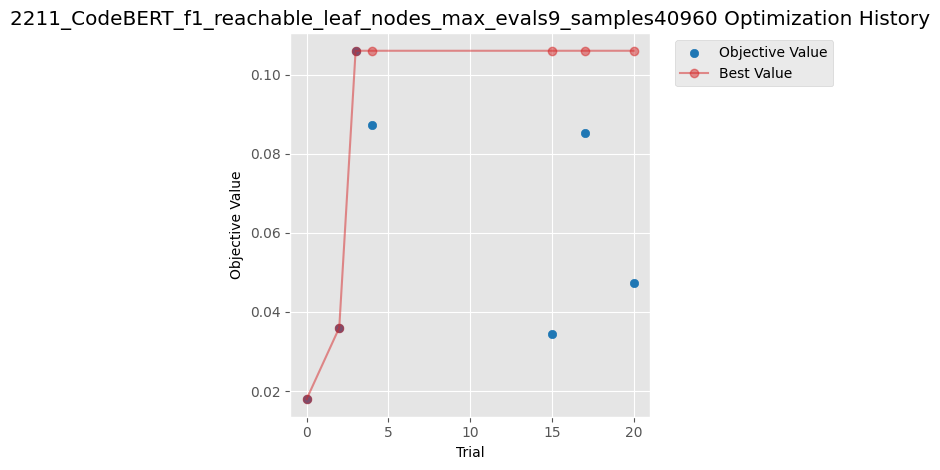

In [5]:
plot_optimization_history(CB_study_names, CB_studies)

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


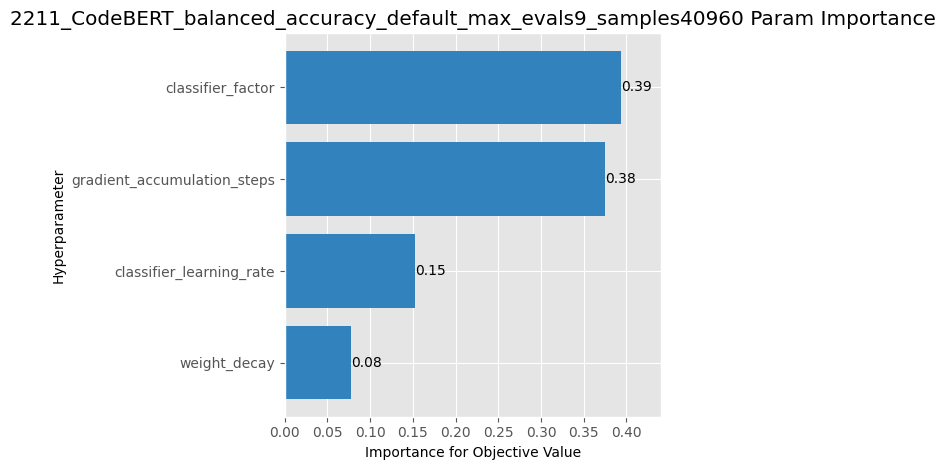

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


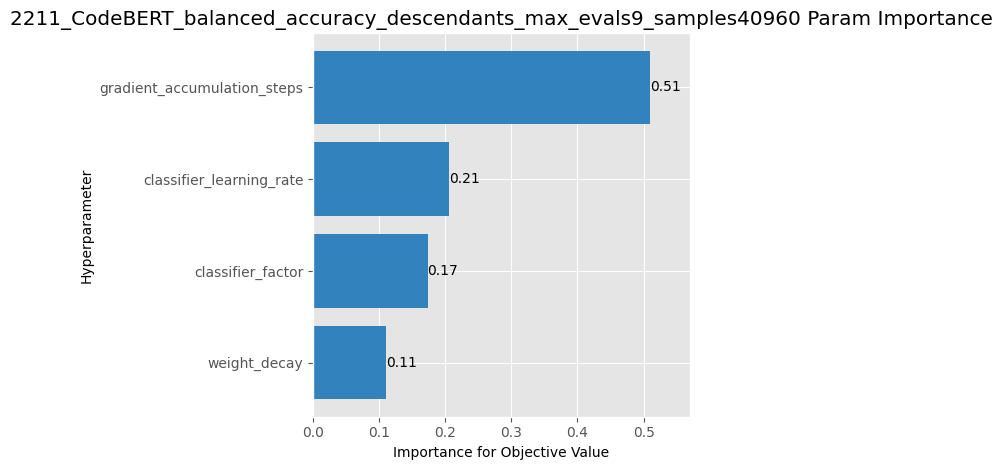

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


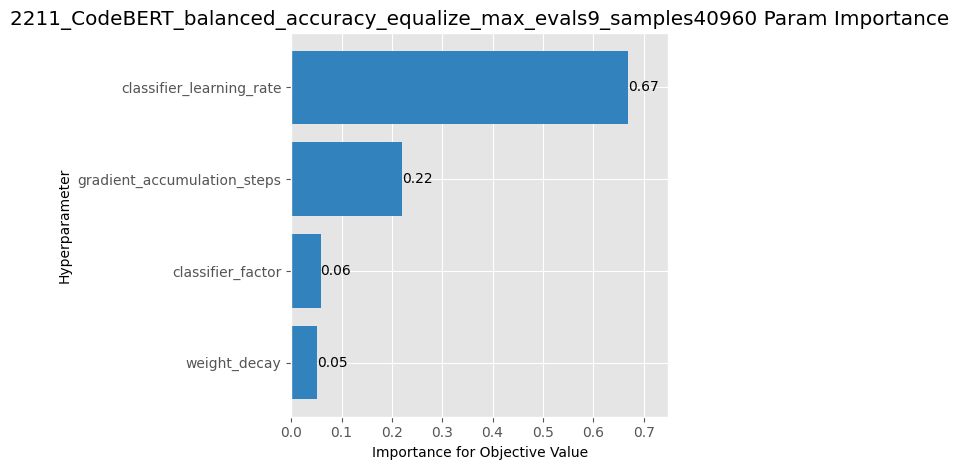

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


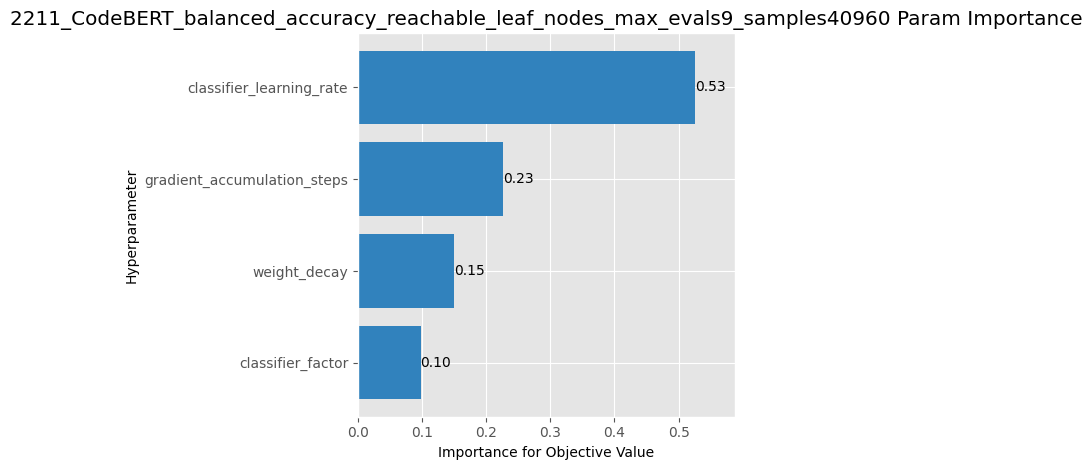

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


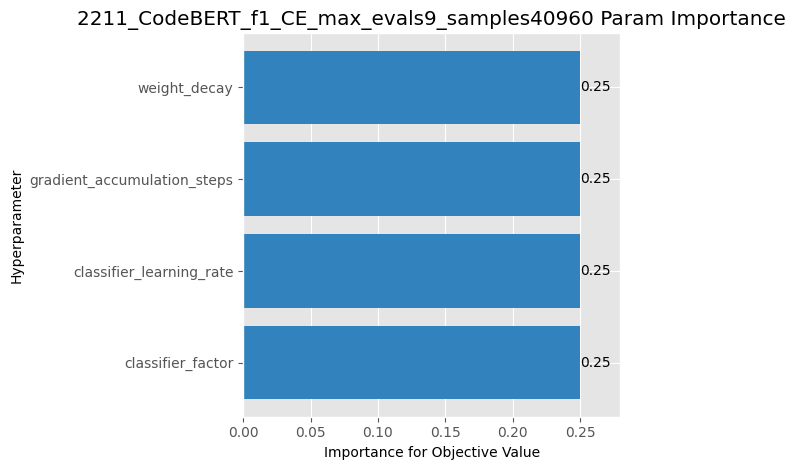

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


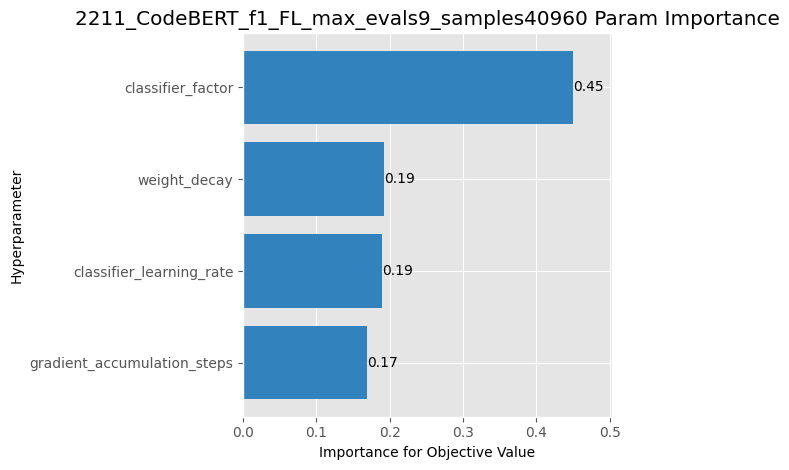

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


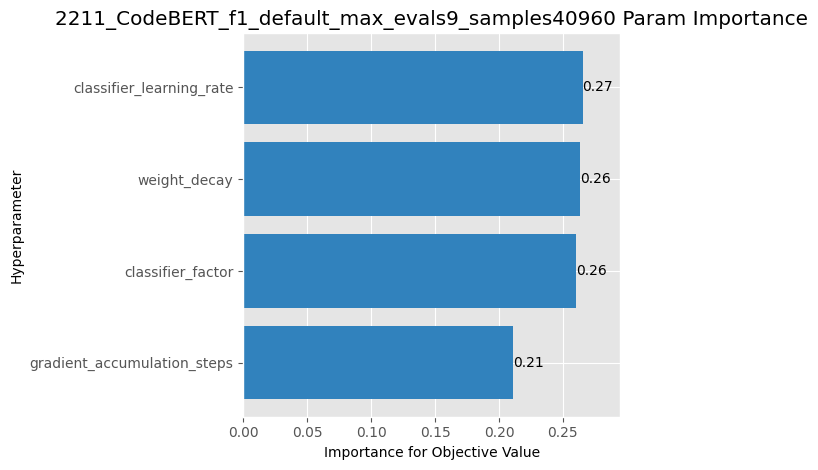

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


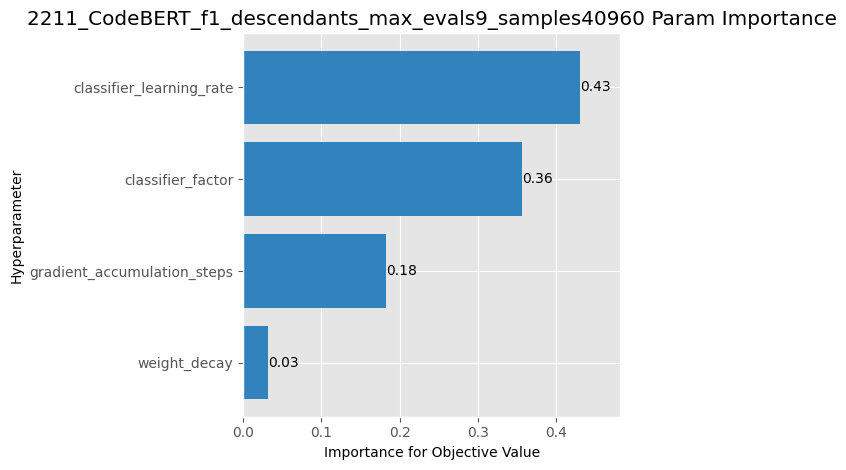

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


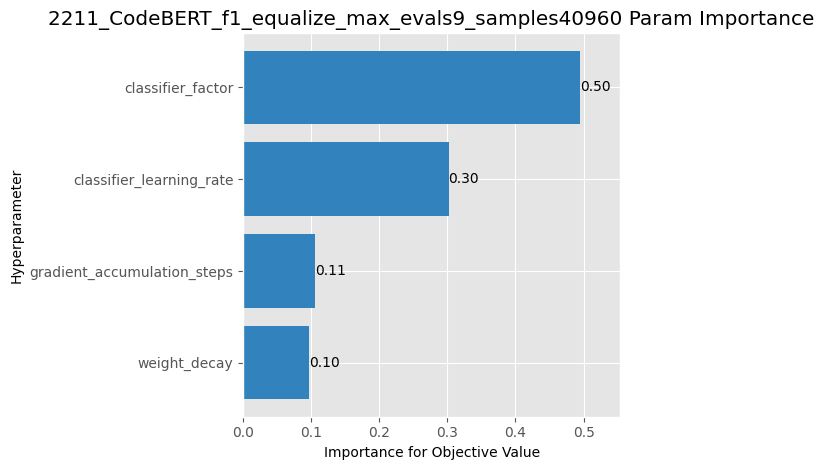

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


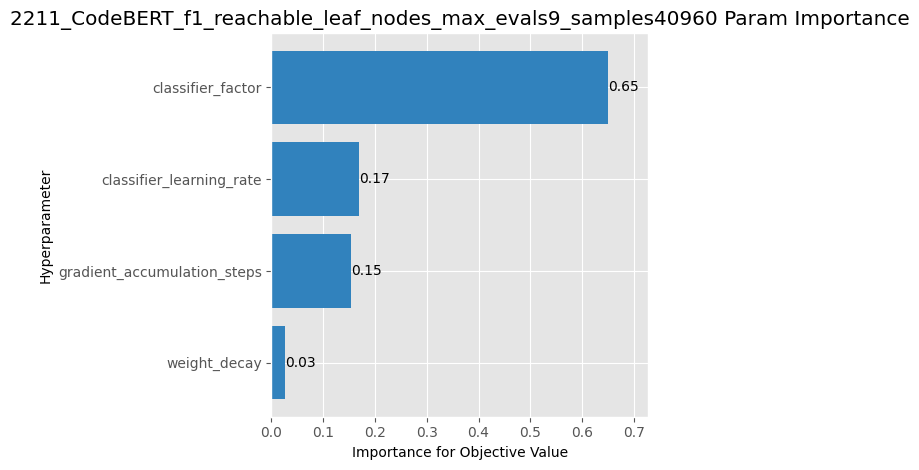

In [14]:
plot_param_importances(CB_study_names, CB_studies)

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


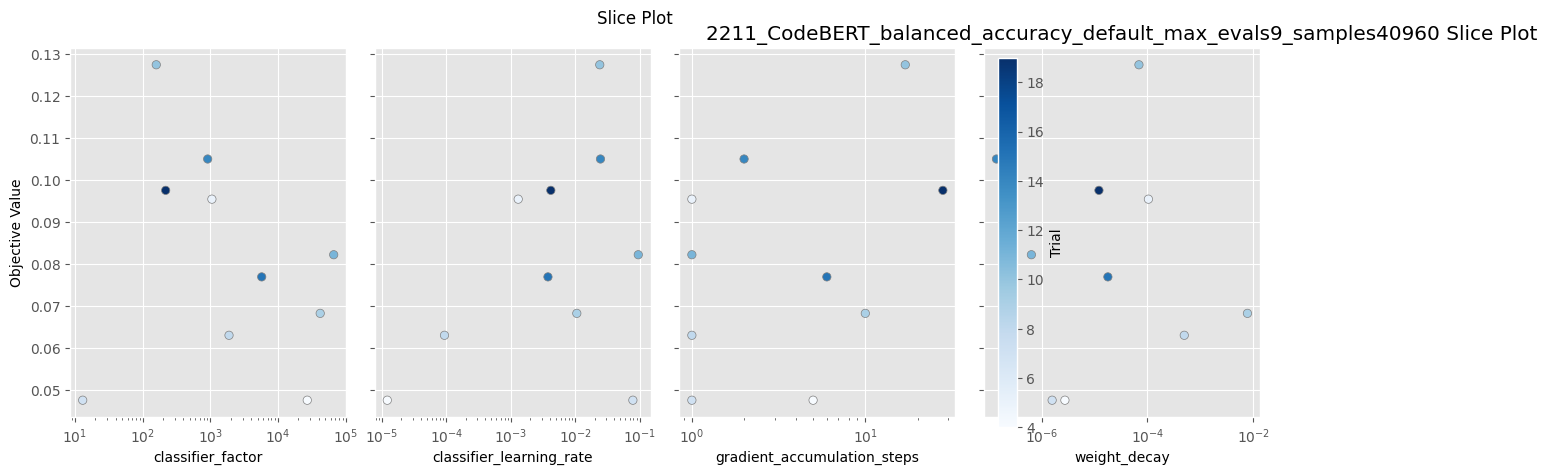

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


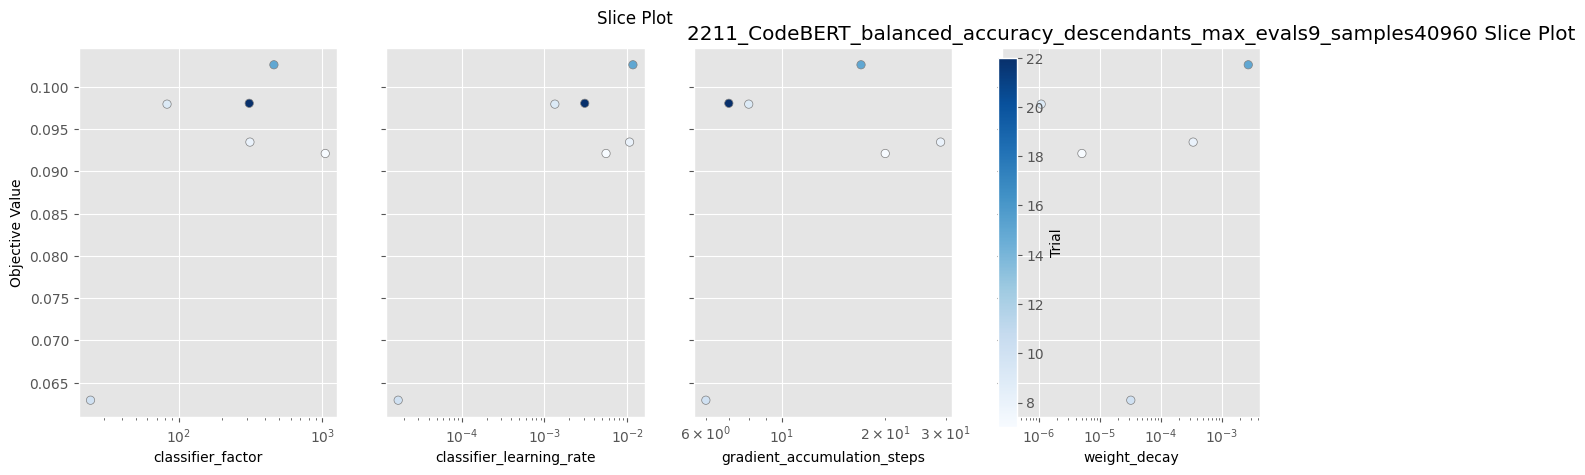

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


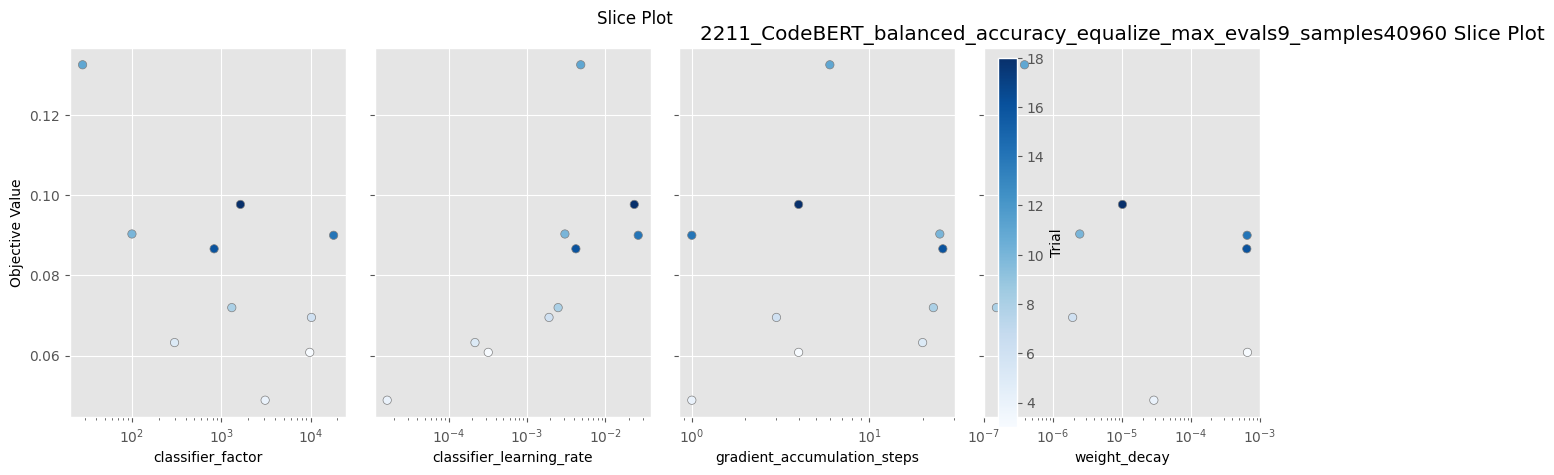

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


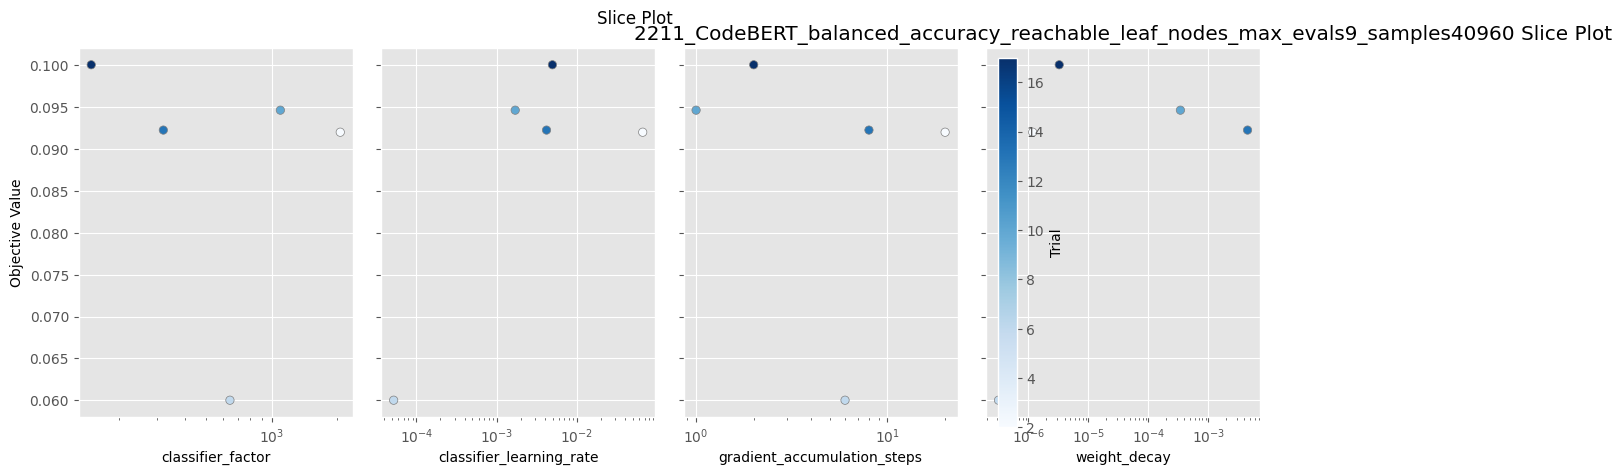

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


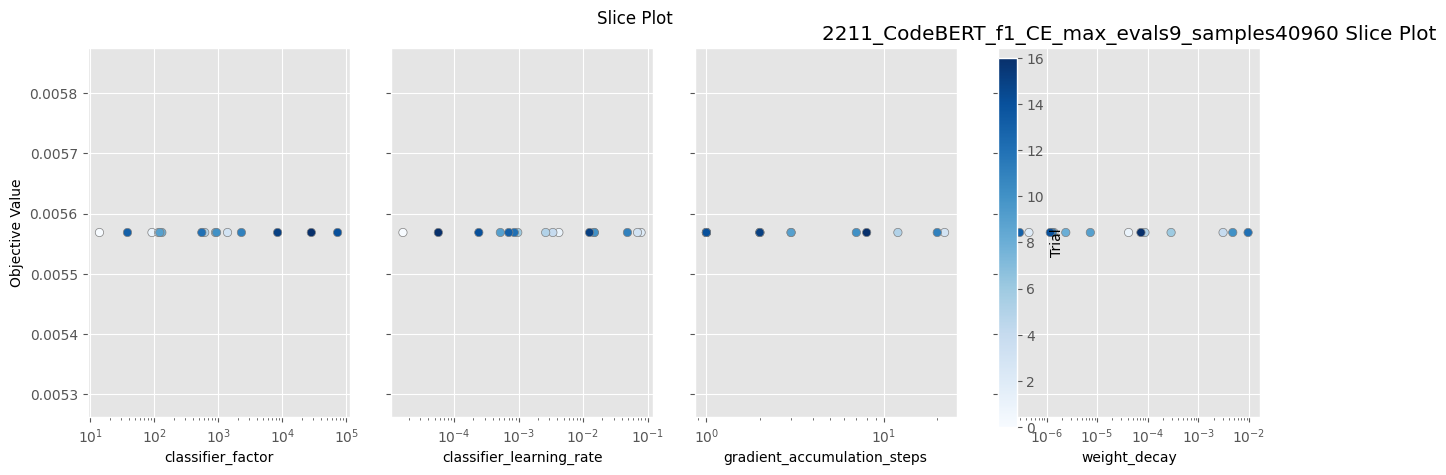

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


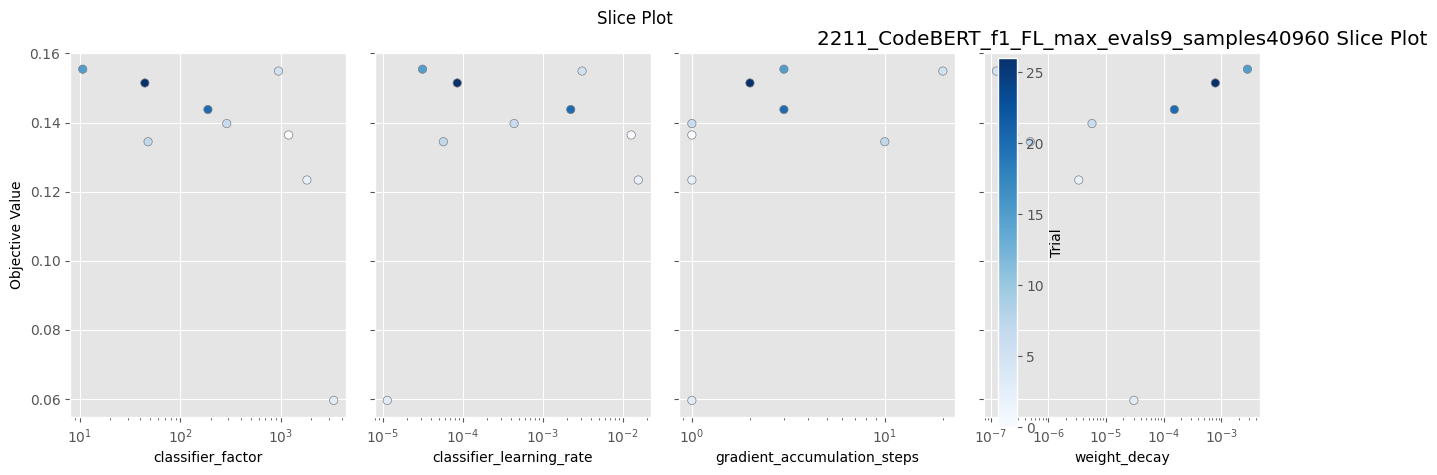

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


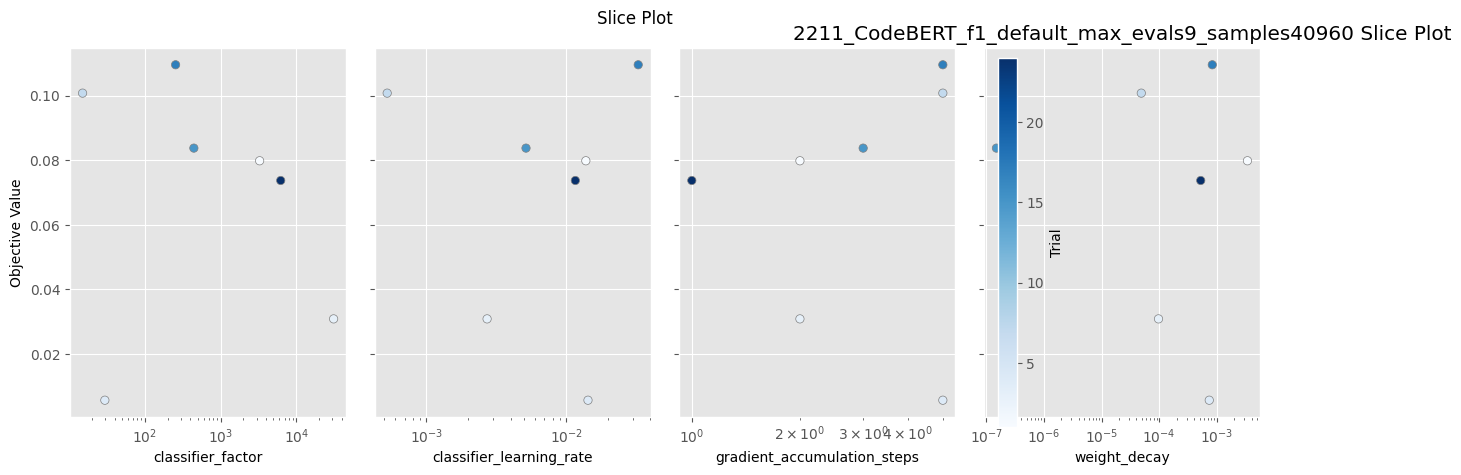

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


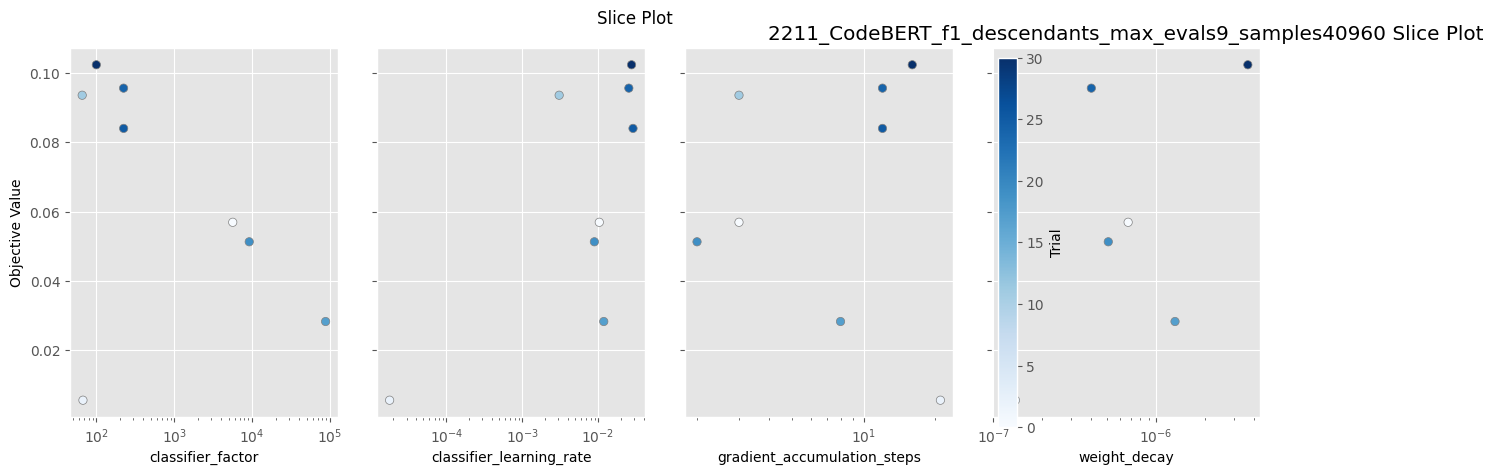

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


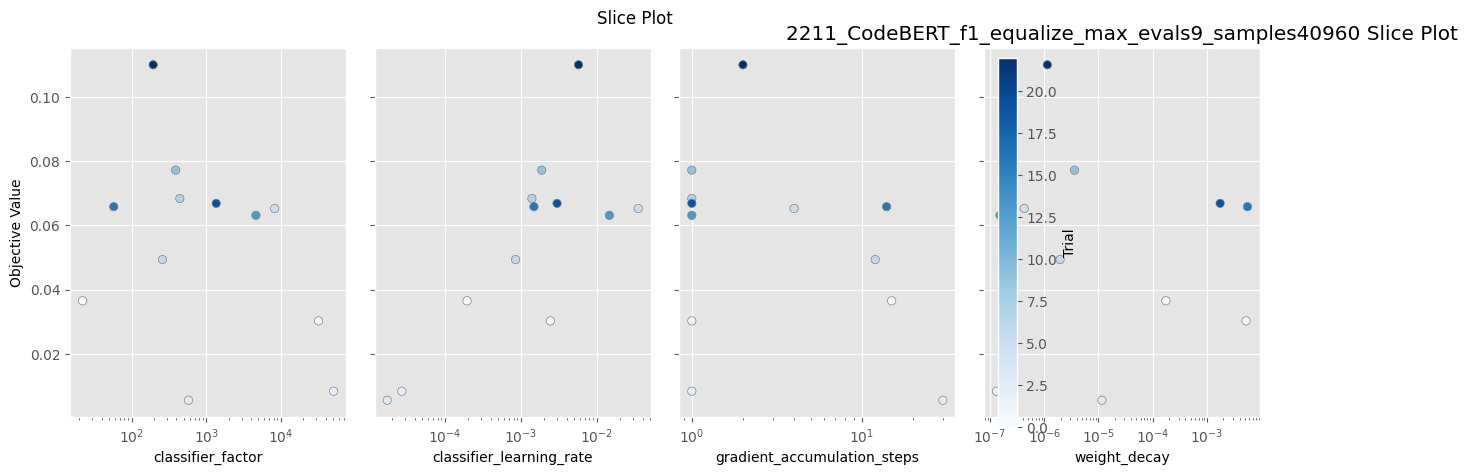

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


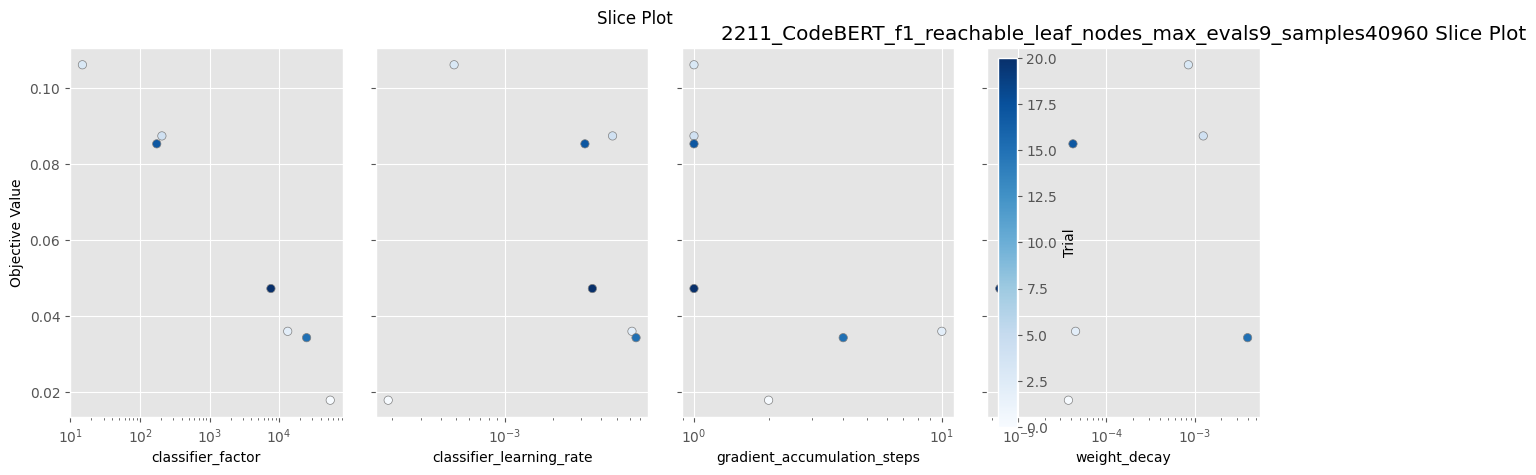

In [8]:
plot_slice(CB_study_names, CB_studies)

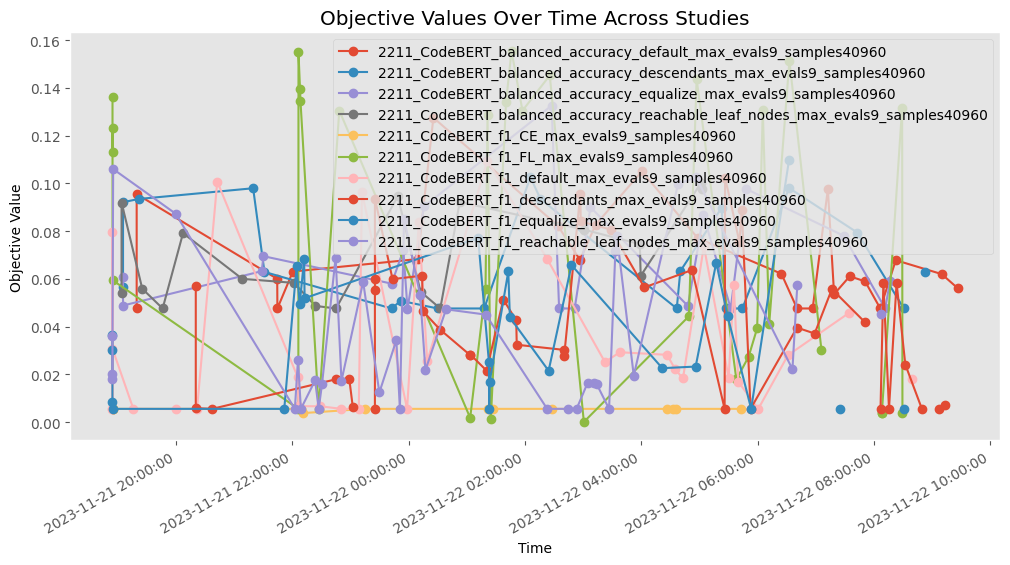

In [9]:
plot_values_over_time(CB_study_names, CB_studies)

## GraphCodeBERT HPO Visualization

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


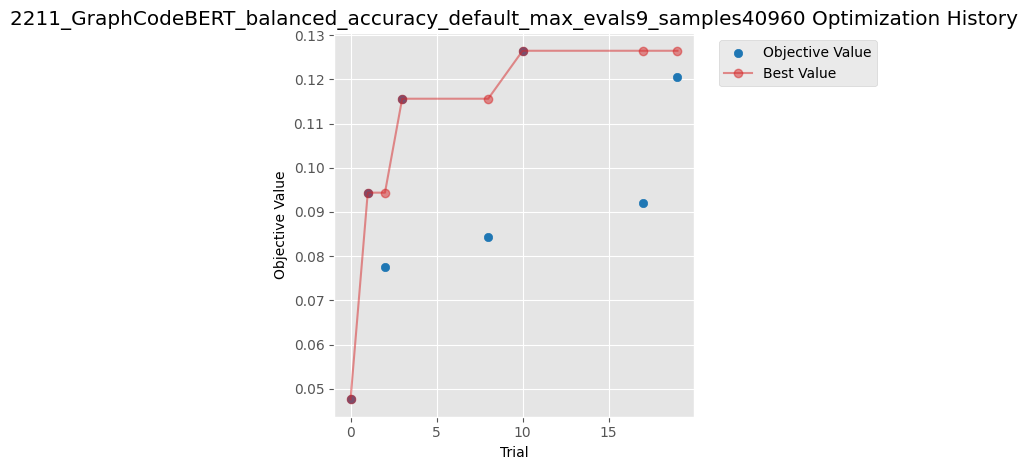

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


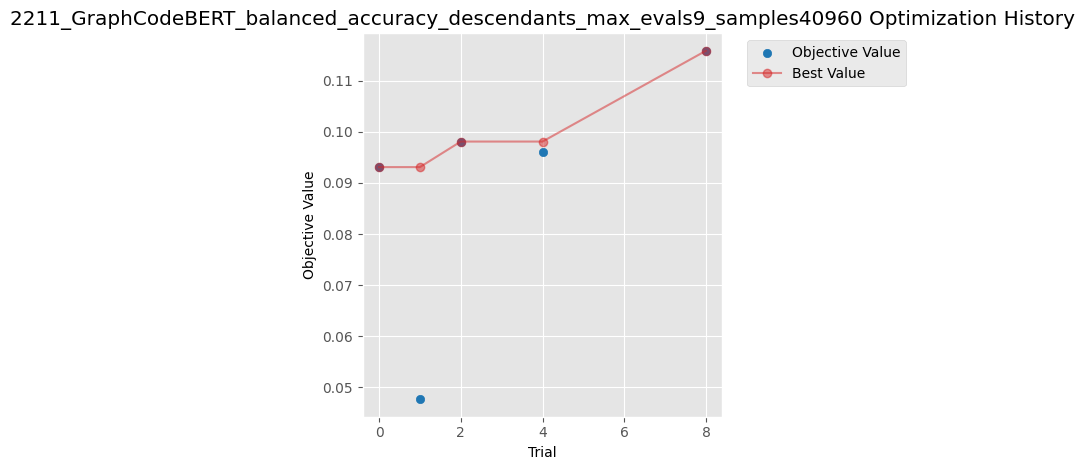

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


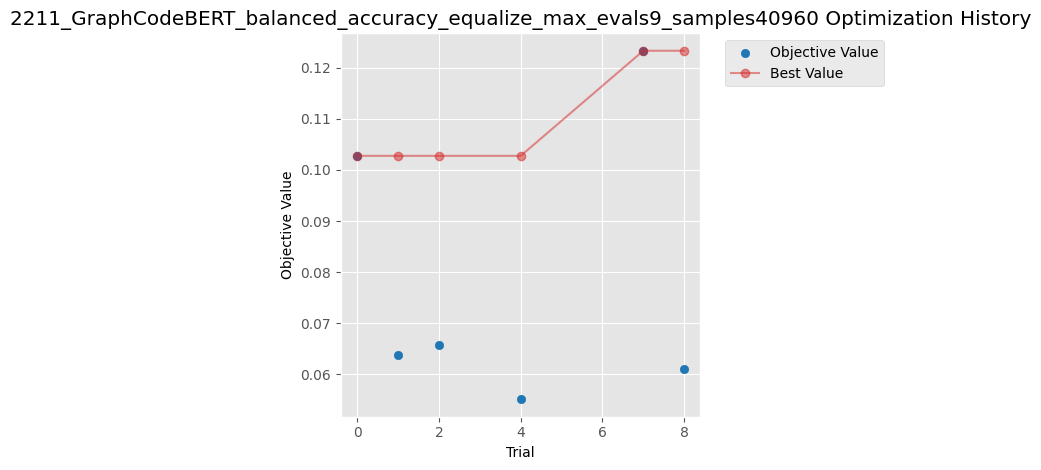

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


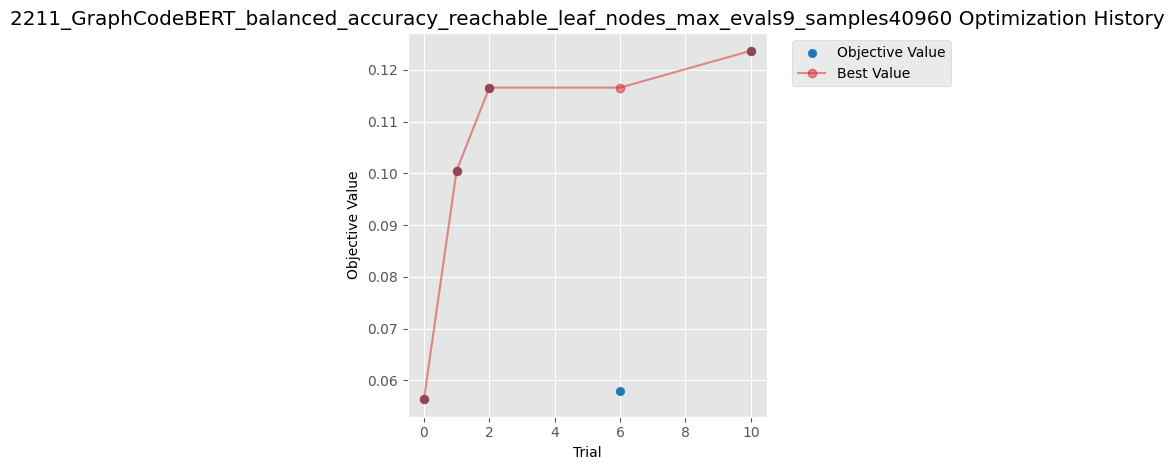

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


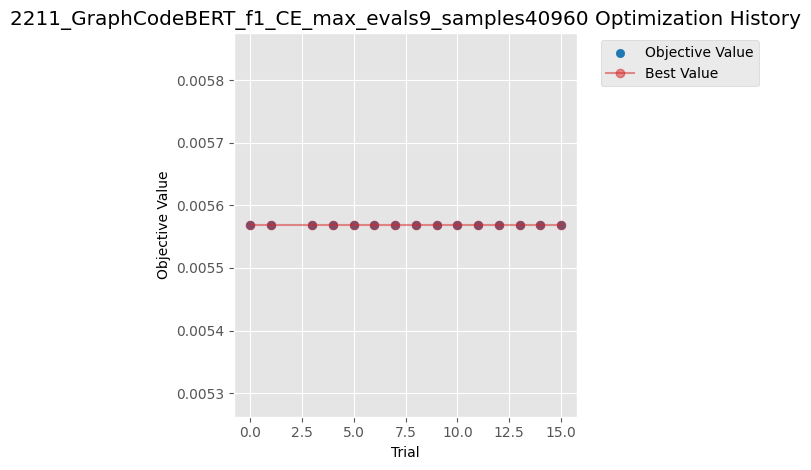

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


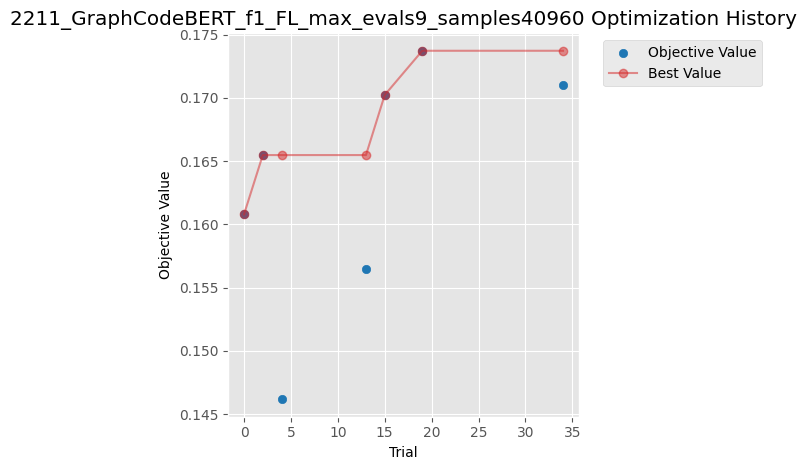

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


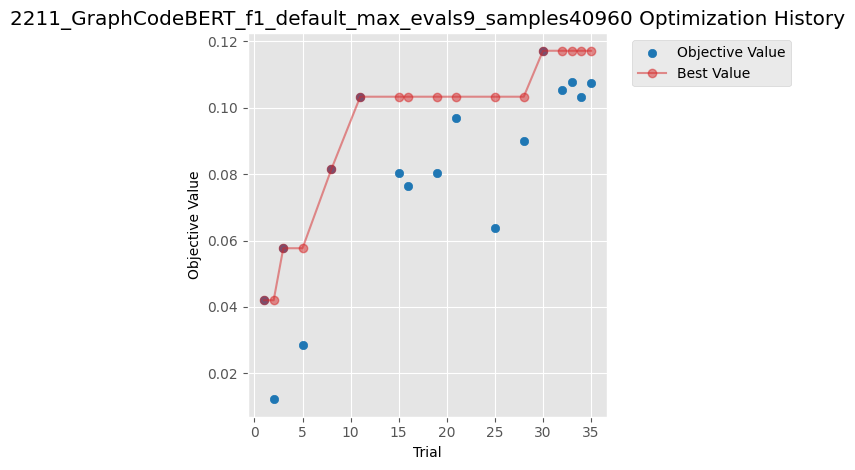

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


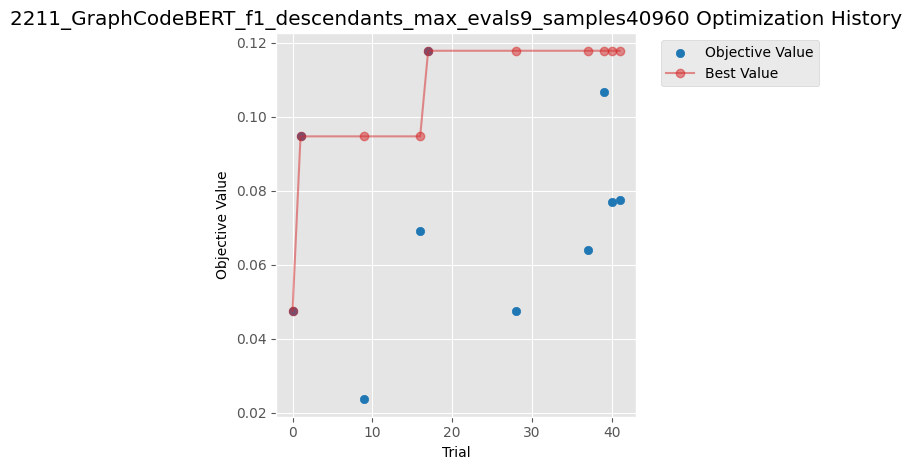

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


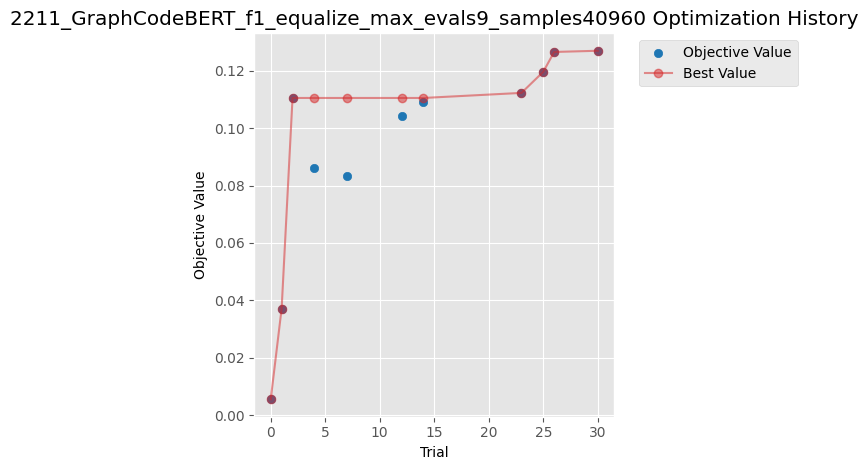

/tmp/ipykernel_82186/4200855125.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


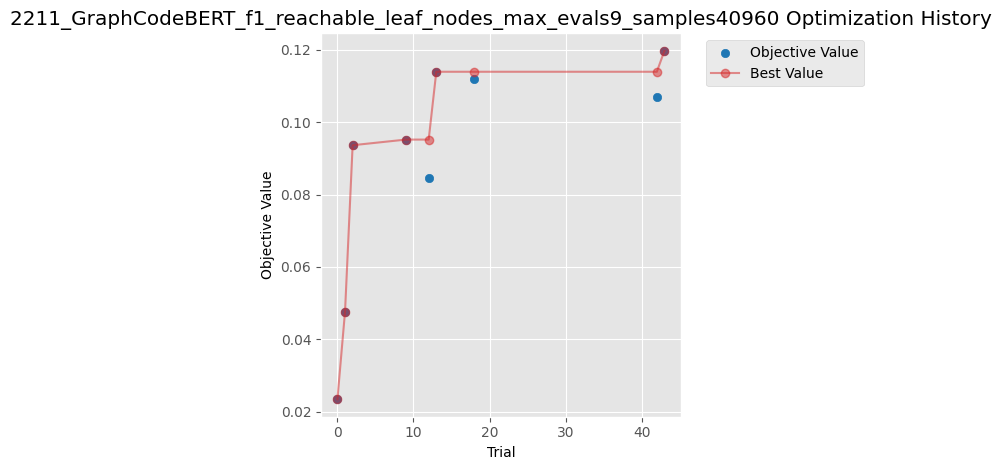

In [10]:
plot_optimization_history(GCB_study_names, GCB_studies)

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


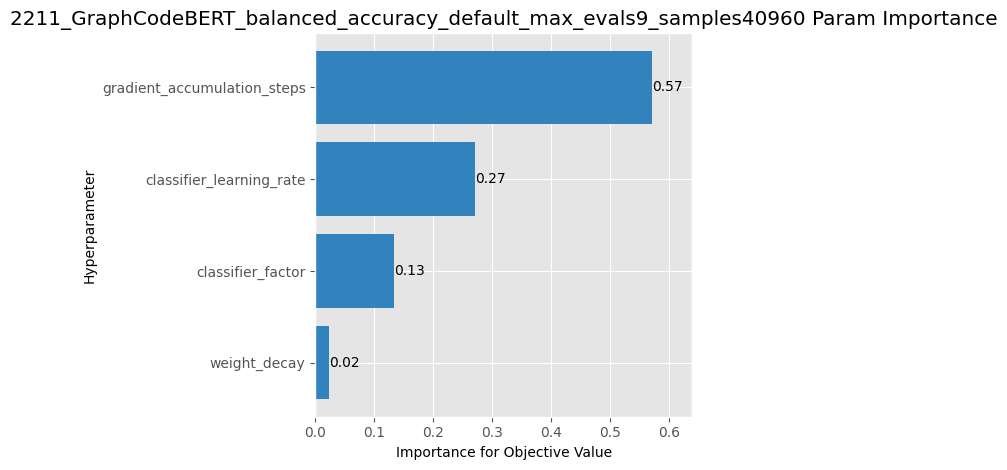

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


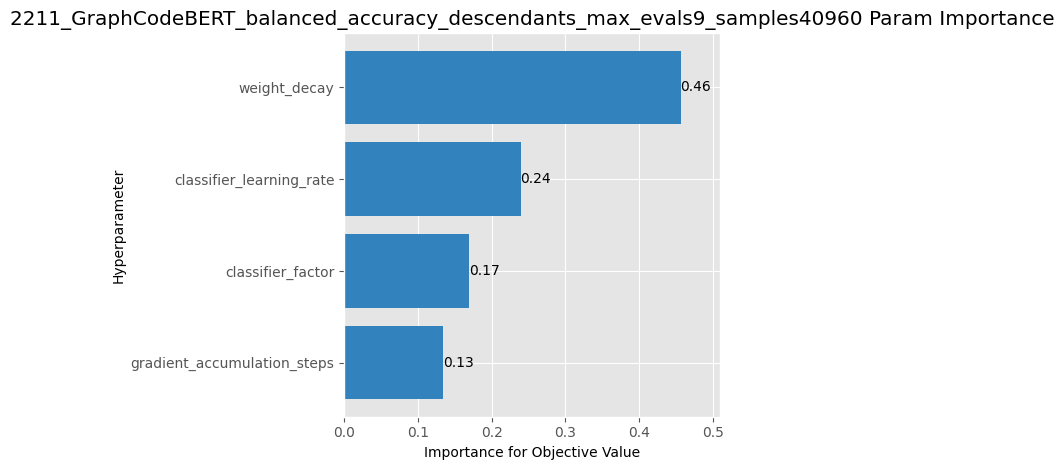

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


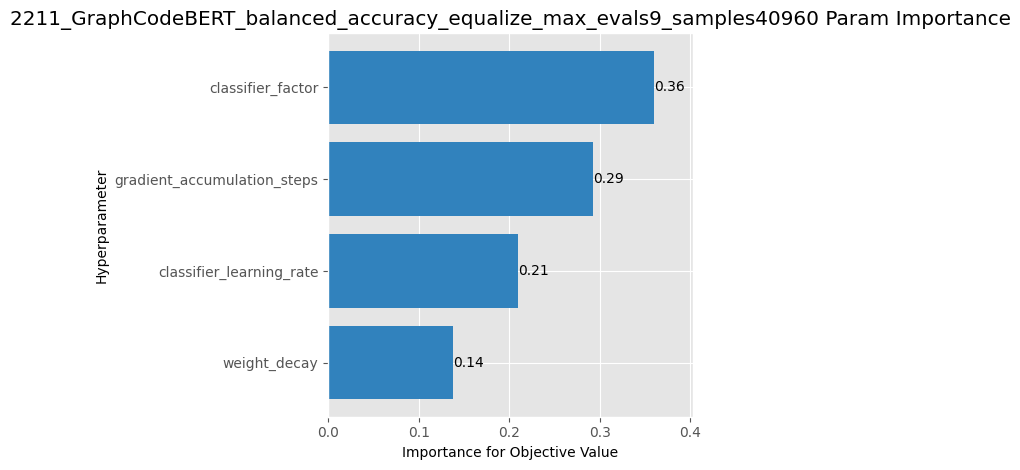

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


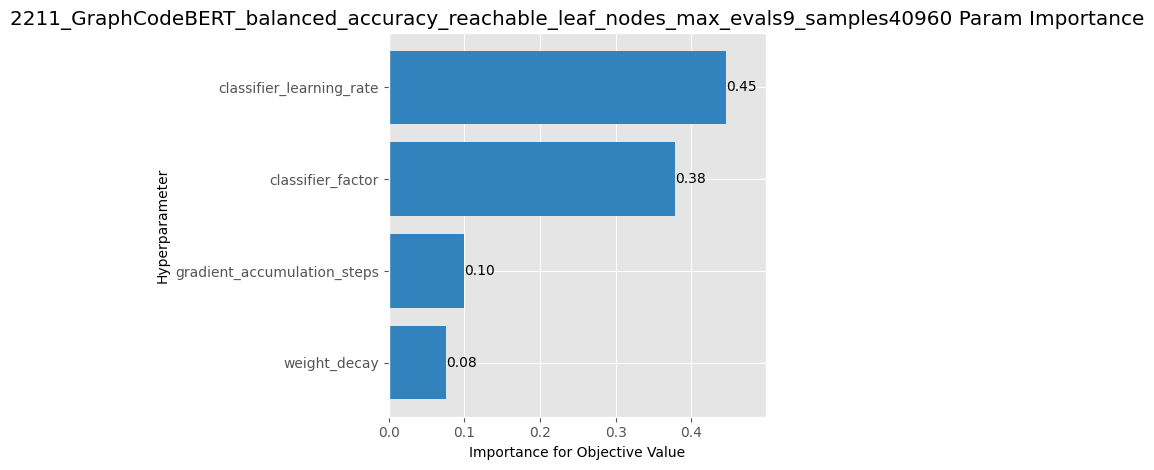

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


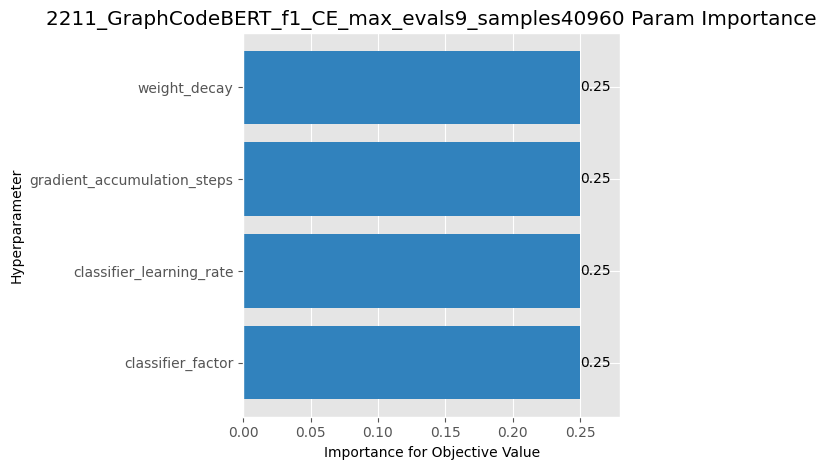

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


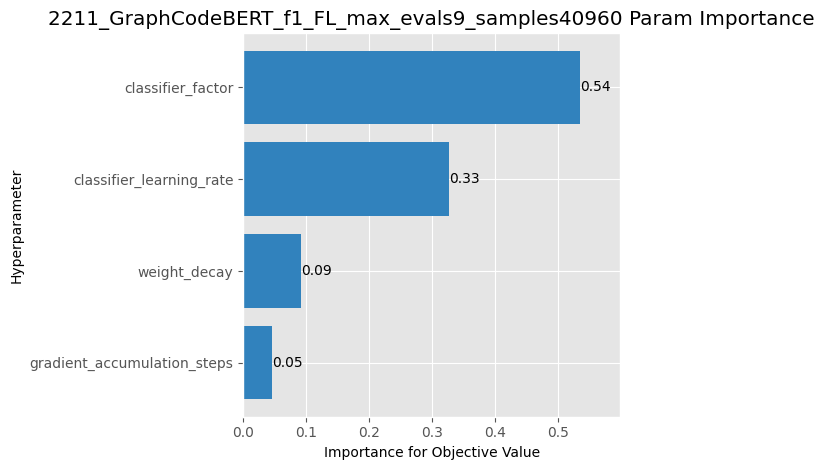

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


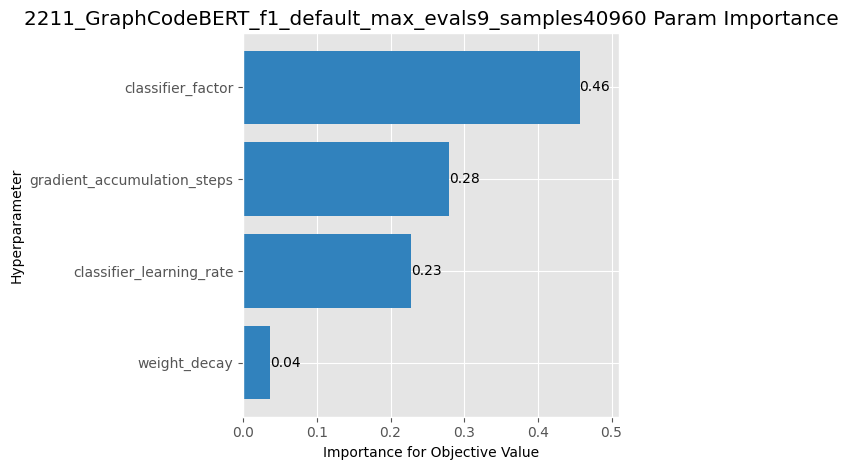

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


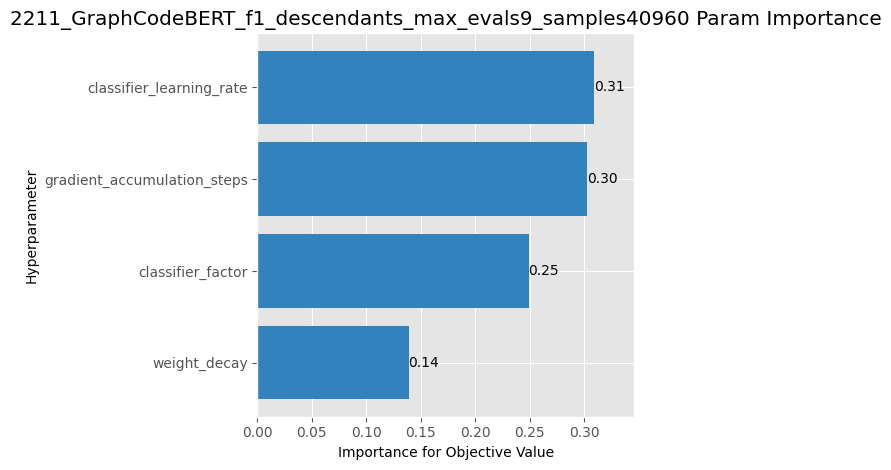

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


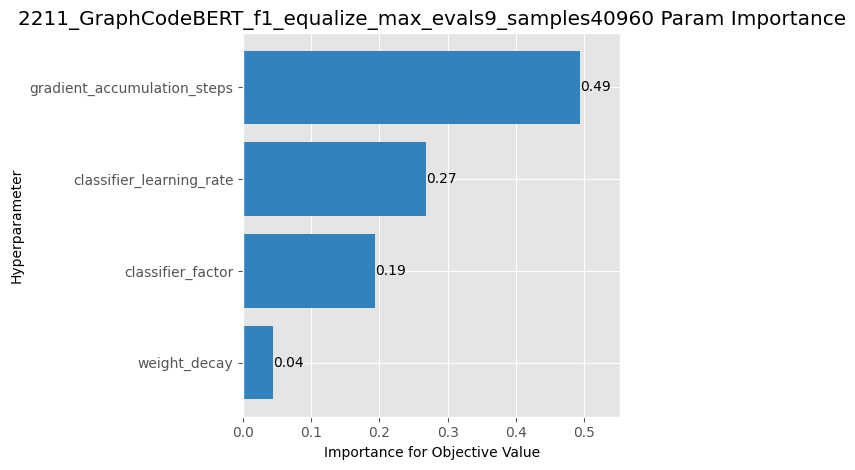

/tmp/ipykernel_82186/4200855125.py:21: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


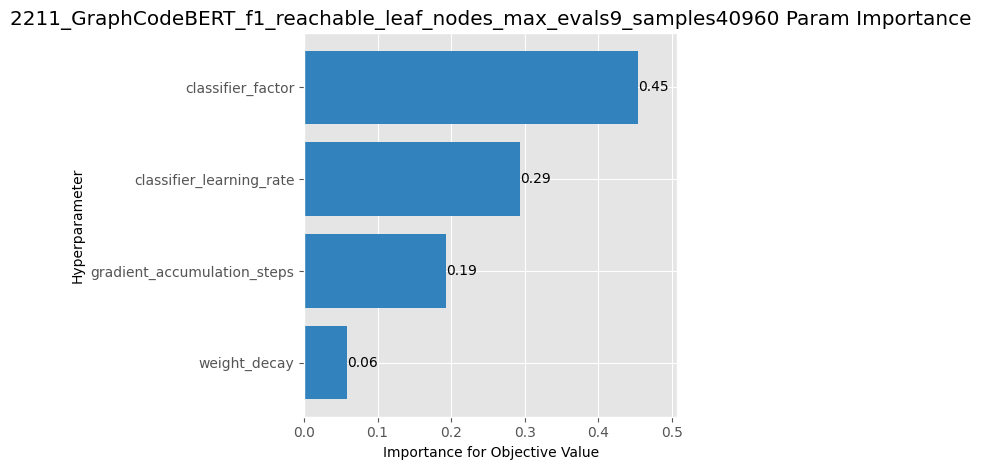

In [11]:
plot_param_importances(GCB_study_names, GCB_studies)

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


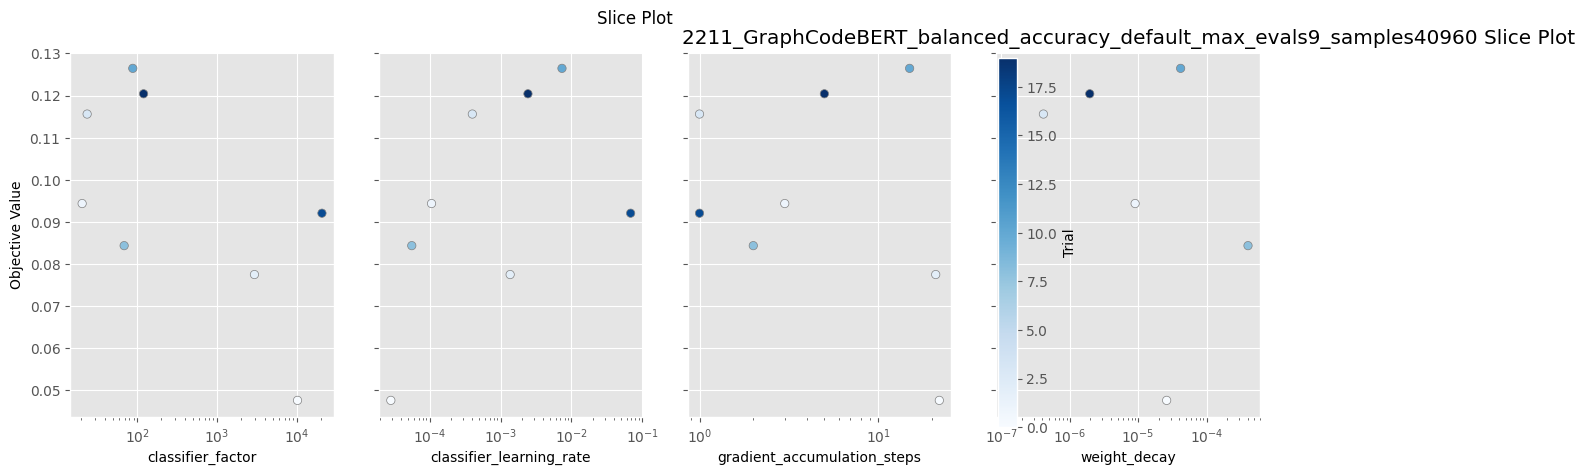

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


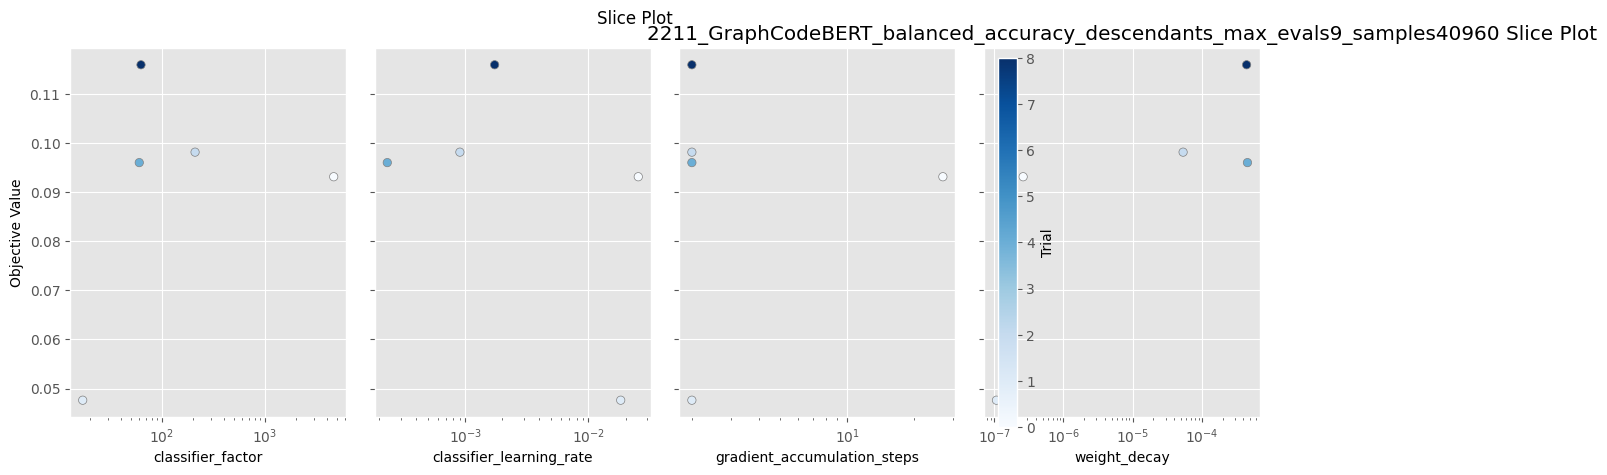

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


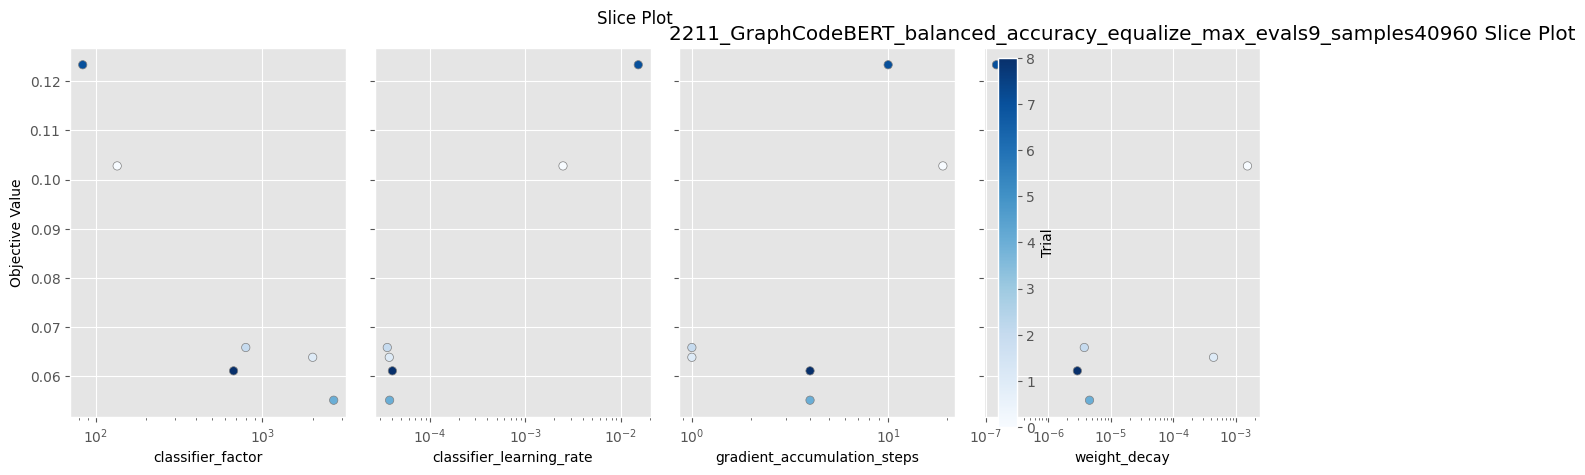

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


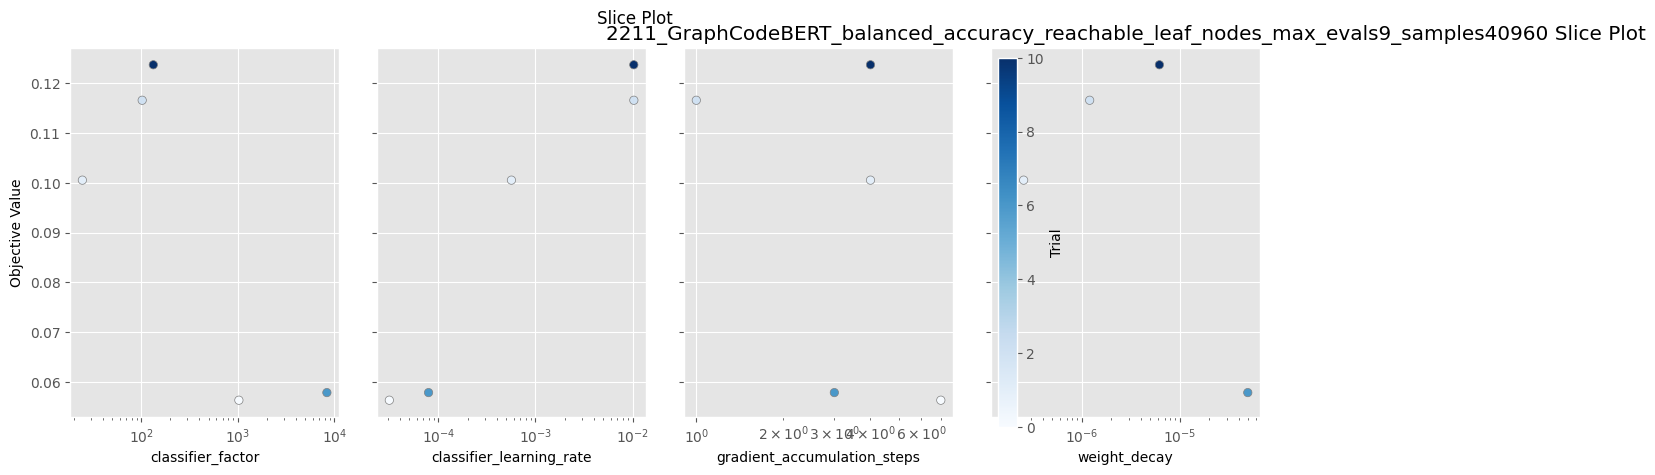

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


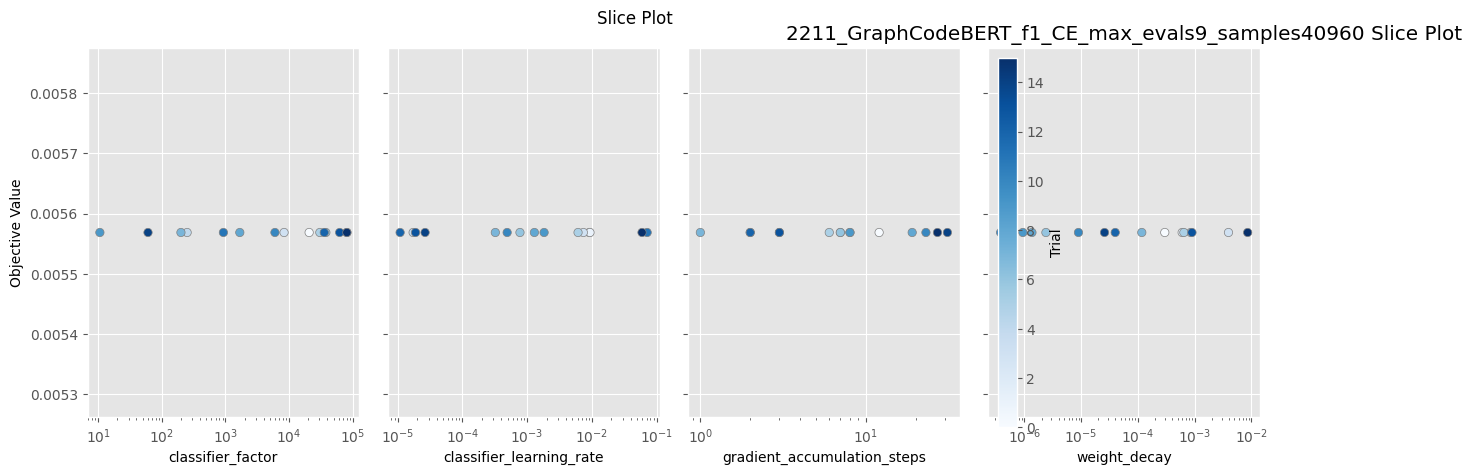

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


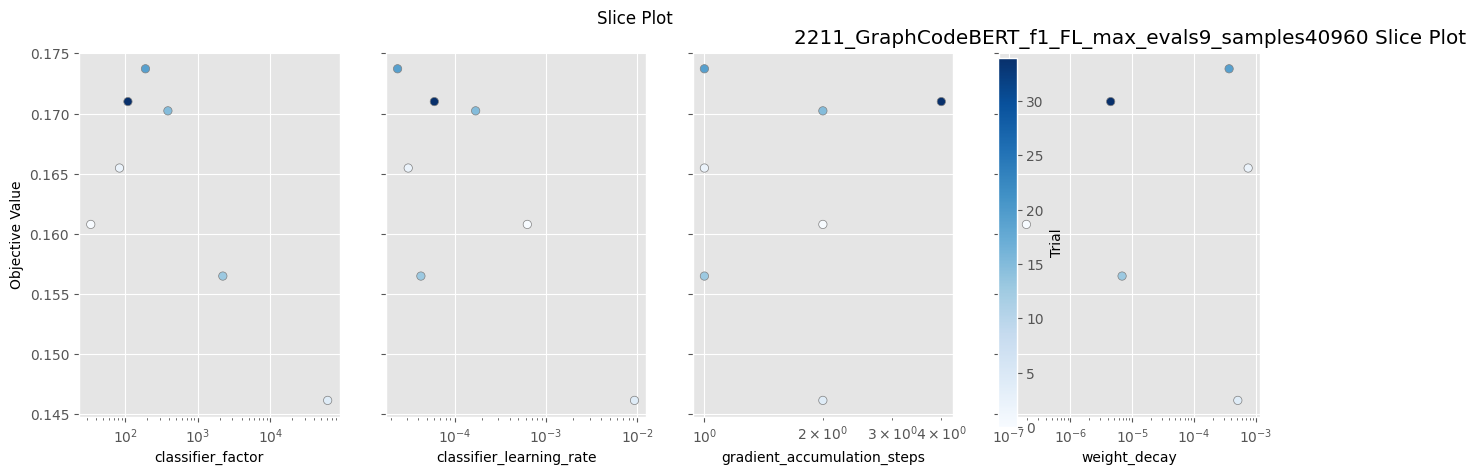

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


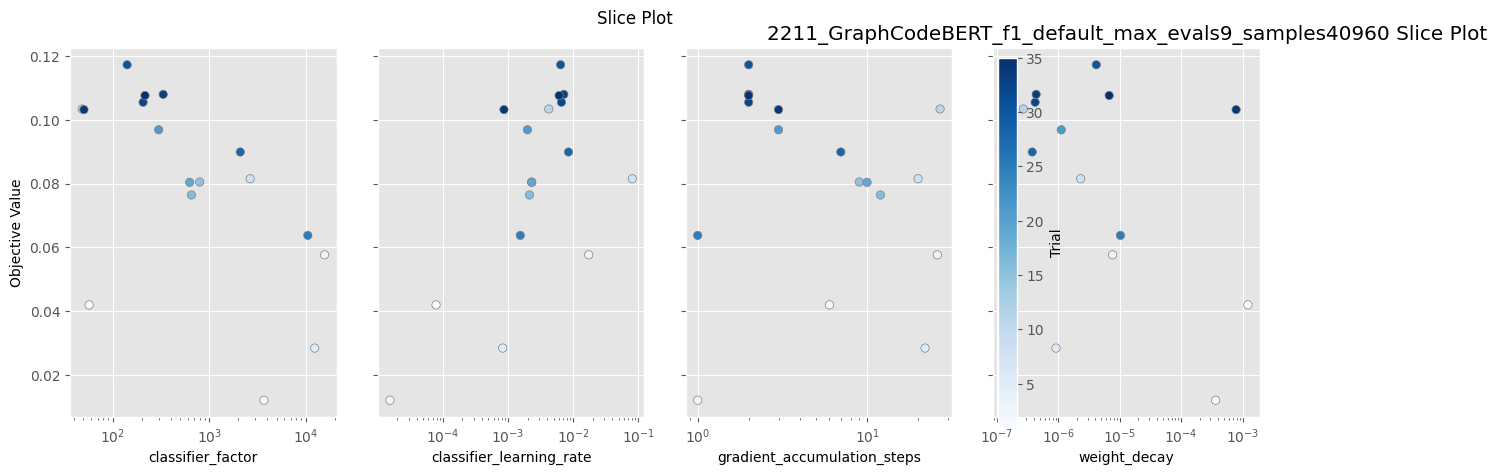

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


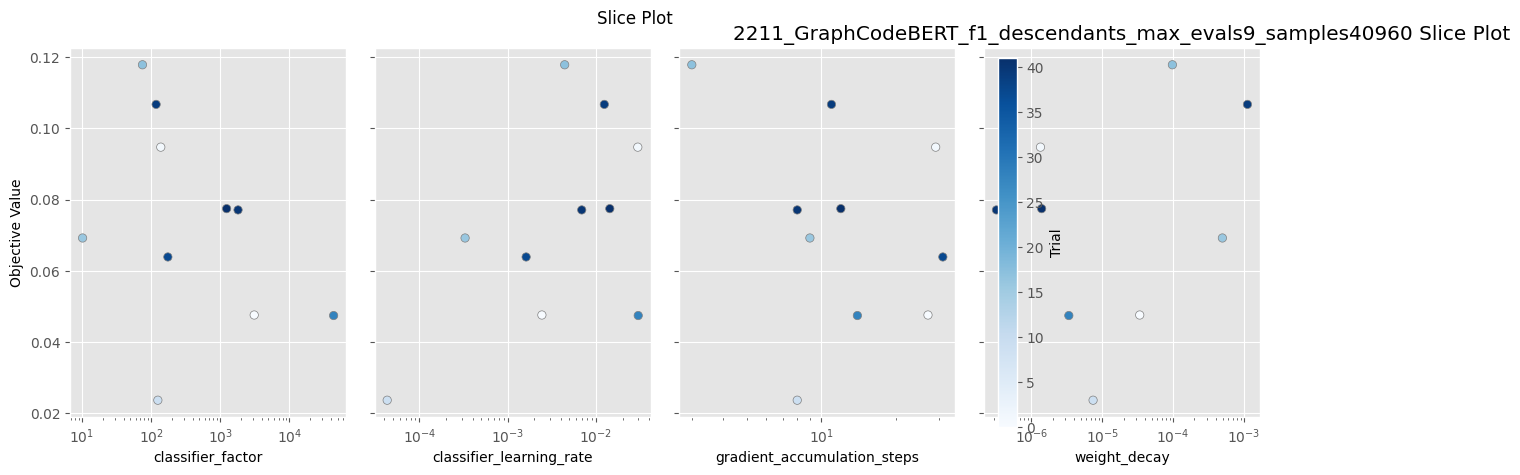

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


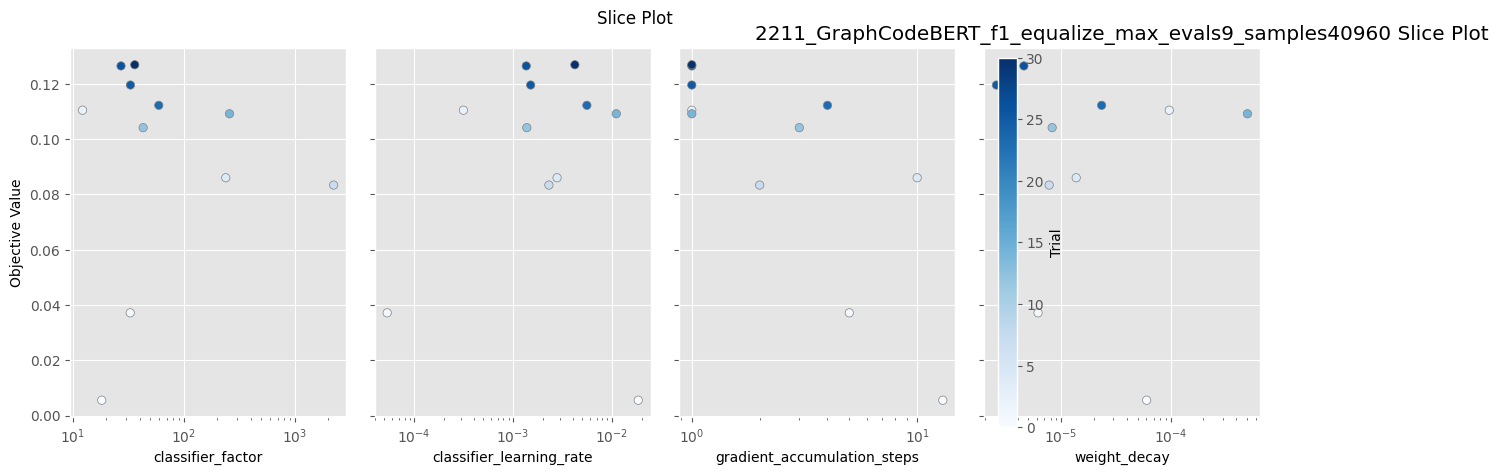

/tmp/ipykernel_82186/4200855125.py:11: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_82186/4200855125.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


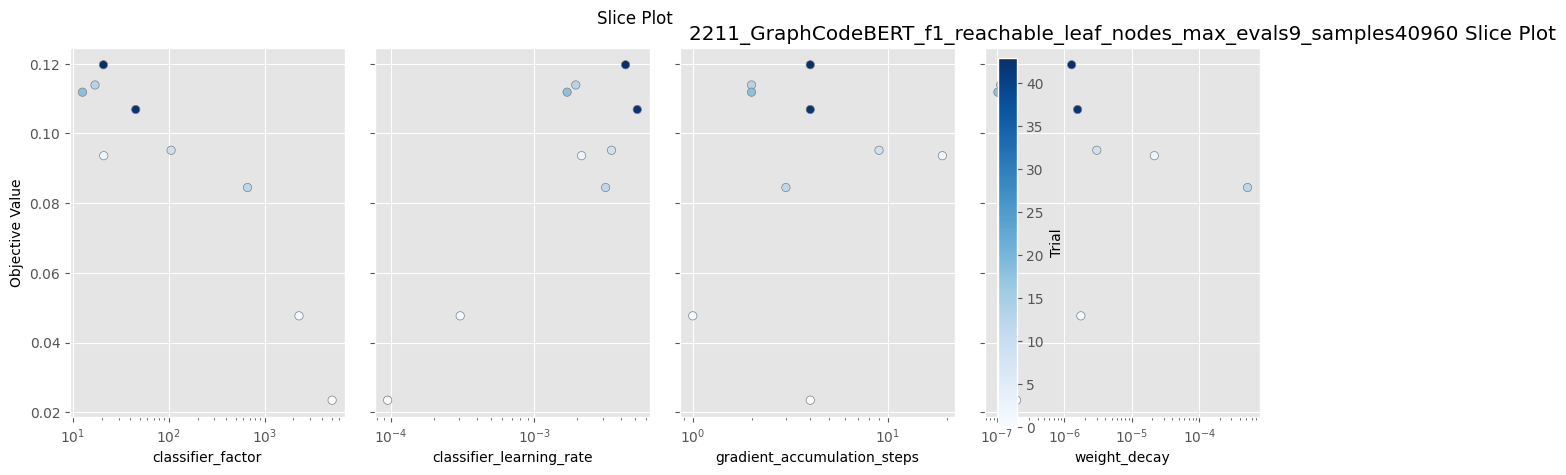

In [13]:
plot_slice(GCB_study_names, GCB_studies)

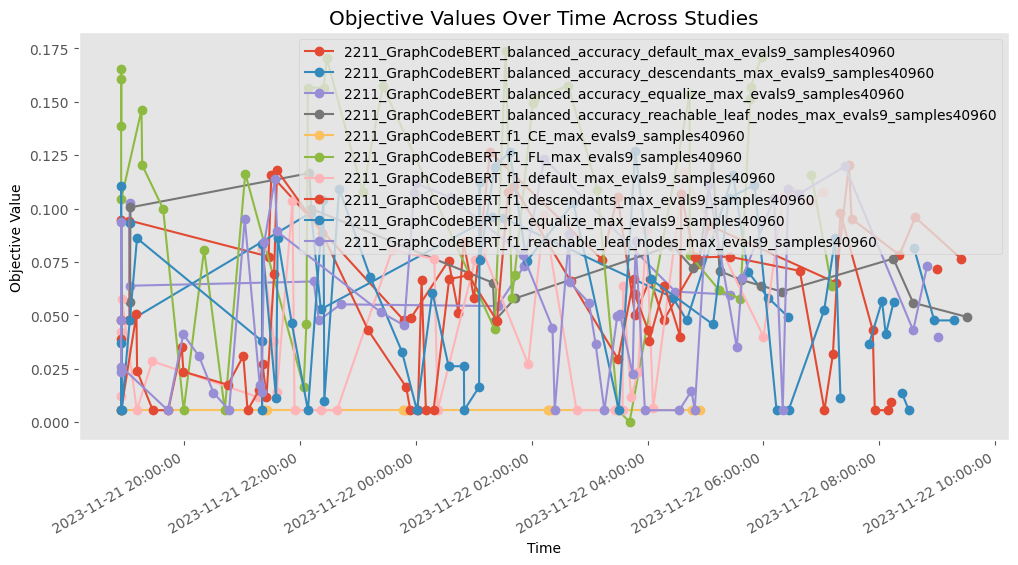

In [12]:
plot_values_over_time(GCB_study_names, GCB_studies)

In [ ]:
# studies[0].trials
# studies[0].best_trial.params
# data = []
# for trial in studies[0].trials:
#     # Only completed trials will be considered
#     if trial.state == optuna.trial.TrialState.COMPLETE:
# #         print(trial)
#         row = trial.params  # Hyperparameters
#         row["objective_value"] = trial.value  # Performance value
#         row["trial_id"] = trial._trial_id
#         data.append(row)

# # Convert the data to a Pandas DataFrame
# df2 = pd.DataFrame(data)
# df2.isna().sum()

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd
# from datetime import datetime

# def smooth_values(values, window_size):
#     """Apply a simple moving average smoothing."""
#     return pd.Series(values).rolling(window=window_size, min_periods=1).mean().tolist()

# def plot_values_over_time_with_smoothing(studies, study_names, window_size=3):
#     plt.figure(figsize=(12, 6))
    
#     for study, name in zip(studies, study_names):
#         trial_timestamps = [datetime.fromtimestamp(trial.datetime_start.timestamp()) for trial in study.trials]
#         trial_values = [trial.value for trial in study.trials]
        
#         # Apply smoothing
#         smoothed_values = smooth_values(trial_values, window_size)

#         plt.plot(trial_timestamps, smoothed_values, marker='o', label=name)

#     # Formatting the plot
#     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#     plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
#     plt.gcf().autofmt_xdate()  # Rotation

#     plt.title(f"Smoothed Objective Values Over Time Across Studies (Window size: {window_size})")
#     plt.xlabel("Time")
#     plt.ylabel("Smoothed Objective Value")
#     plt.legend()
#     plt.grid()
#     plt.show()

# plot_values_over_time_with_smoothing(studies, study_names,window_size=50)
